<p style='text-align:left'>School of Computer Sciences, Universiti Sains Malaysia.<br>Semester 2, 2020/2021</p>

# CDS513 Assignment 2: Time Series Analysis and Forecasting <a name="assign02"></a>

<p style='text-align:left'>Lee Yong Meng (P-COM0012/20)</p>

***

## Overview

**Introduction**  
- Dataset: *Background Story, Attributes*
- Loading Dataset: *Training Set, Test Set*
- Combining Dataset

**Section 1: [ARIMA](#arima)**
- Step 1: [Check Stationarity](#stationarity)
- Step 2: [Differencing the Time Series Data](#differencing)
- Step 3: [Determining $p$ and $q$ of ARIMA Model](#arima-order)
- Step 4: [Fit an ARIMA Model](#arima-fit)
- Step 5: [Residual Diagnosis](#residual)
- Step 6: [ARIMA Predict](#arima-predict)
- Step 7: [ARIMA Forecast](#arima-forecast)

**Section 2: [SARIMAX](#sarimax)**
- Step 1: [Determine Orders for SARIMAX Model using Auto ARIMA](#sarimax-order)
- Step 2: [Fit SARIMAX Model](#sarimax-fit)
- Step 3: [SARIMAX Diagnosis](#sarimax-residual)
- Step 4: [SARIMAX Predict](#sarimax-predict)
- Step 5: [SARIMAX Forecast](#sarimax-forecast)

**Section 3: [Machine Learning](#machine-learning)**
- Step 1: [Data Preparation](#ml-data)
- Step 2: [Machine Learning Models](#ml-model)
- Step 3: [The Best Model](#ml-best)
- Step 4: [Forecasting](#ml-forecast)

***

# Introduction

## Dataset

Bike Sharing Demand Data: https://www.kaggle.com/c/bike-sharing-demand/data

<img src="https://images.unsplash.com/photo-1609959164279-8874a3e2a920?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1950&q=80">

Photo by <a href="https://unsplash.com/@adoucett?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Aaron Doucett</a> on <a href="https://unsplash.com/s/photos/bikeshare?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

About this dataset (extracted from [Kaggle](https://www.kaggle.com/c/bike-sharing-demand/overview)):

### Background Story

> Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.
> 
> The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

This dataset consists of 2 files:

- `train.csv`: records of the first 19 days of each month.
- `test.csv`: records of the days from 20th of each month.

### Attributes

##### `train.csv` and `test.csv`
- `datetime`: hourly date + timestamp
- `season`: 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- `holiday`: whether the day is considered a holiday
- `workingday`: whether the day is neither a weekend nor holiday
- `weather`: 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- `temp`: temperature in Celsius
- `atemp`: "feels like" temperature in Celsius
- `humidity`: relative humidity
- `windspeed`: wind speed

##### `train.csv` only
- `casual`: number of non-registered user rentals initiated
- `registered`: number of registered user rentals initiated
- `count`: number of total rentals

Columns/Measurements under consideration: `temp`, `humidity`, `windspeed`  
Target column: `count` 

In [1]:
# ================================================================================ 
# Import Pandas Library
# ================================================================================ 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize':(15, 6)})
%matplotlib inline

plt.rcParams["figure.dpi"] = 200

## Loading Dataset

### Training Set

In [2]:
# ================================================================================ 
# Training set
# ================================================================================ 
df_train = pd.read_csv('src/train.csv')
df_train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# Information about the training set
print("> Number of rows and columns in the training set:")
display(df_train.shape)

print("> The general statistics of each column in the training set:")
display(df_train.describe())
display(df_train.describe(include=[object]))

print("> The data type and number of non-null values in each column:\n")
display(df_train.info())

> Number of rows and columns in the training set:


(10886, 12)

> The general statistics of each column in the training set:


season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

datetime
count                 10886
unique                10886
top     2012-05-08 21:00:00
freq                      1

> The data type and number of non-null values in each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

In [4]:
# Check missing value
np.sum(df_train.isna())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Note:** There is no missing value in the training set.

Check if `count = casual + registered`

In [5]:
# Check data validity
np.sum(df_train['count'] != df_train['casual'] + df_train['registered'])

0

**Note:** Verified, none of the rows have different `count` values from `casual + registered`.

Therefore, `count = casual + registered`.

The next thing to do is to explore the correlation between columns/measurements under consideration and `count`.

(Assume that `count` is of interest.)

In [6]:
# ================================================================================ 
# Inspect correlation between each feature to the target
# ================================================================================ 
FEATURES = ['temp', 'humidity', 'windspeed']

def display_correlation(df, features, target, ascending=False):
    print(f"> Correlation between selected features with target: \"{target}\"")
    display(df[features+[target]].corr()[target].sort_values(ascending=ascending)[1:])

    
print("Selected features are:")
_ = [print(f"* {f}") for f in FEATURES]
print()

display_correlation(df_train, FEATURES, 'count')
display_correlation(df_train, FEATURES, 'casual')
display_correlation(df_train, FEATURES, 'registered')

Selected features are:
* temp
* humidity
* windspeed

> Correlation between selected features with target: "count"


temp         0.394454
windspeed    0.101369
humidity    -0.317371
Name: count, dtype: float64

> Correlation between selected features with target: "casual"


temp         0.467097
windspeed    0.092276
humidity    -0.348187
Name: casual, dtype: float64

> Correlation between selected features with target: "registered"


temp         0.318571
windspeed    0.091052
humidity    -0.265458
Name: registered, dtype: float64

**Note:** In all cases, the feature `temp` (temperature) is highly correlated to different assigned targets.

This is only for train, therefore, it is very likely that the test set have quite different distribution, who knows?

### Test Set

In [7]:
# ================================================================================ 
# Test set
# ================================================================================ 
df_test = pd.read_csv('src/test.csv')
df_test

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-20 00:00:00       1        0           1        1  10.66   
1     2011-01-20 01:00:00       1        0           1        1  10.66   
2     2011-01-20 02:00:00       1        0           1        1  10.66   
3     2011-01-20 03:00:00       1        0           1        1  10.66   
4     2011-01-20 04:00:00       1        0           1        1  10.66   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
0     11.365        56    26.0027  
1     13.635        56     0.0000  
2     13.635        56     0.0000  
3     12.880        56    11.0014  
4     12.880        56    11.0014  
...      ...       ...        ...  
6488  12.880        60    11.0014  
6489  12.880        60    11.0014  
6490  12.880        60    11.0014  
6491  13.635        56     8.9981  
6492  13.635        65     8.9981  

[6493 rows x 9 columns]

In [8]:
# Information of test set
print("> Number of rows and columns in the test set:")
display(df_test.shape)

print("> The general statistics of each column in the test set:")
display(df_test.describe())
display(df_test.describe(include=[object]))

print("> The data type and number of non-null values in each column:\n")
display(df_test.info())

> Number of rows and columns in the test set:


(6493, 9)

> The general statistics of each column in the test set:


season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

datetime
count                  6493
unique                 6493
top     2011-04-24 08:00:00
freq                      1

> The data type and number of non-null values in each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


None

## Combining Dataset 

In [9]:
df_train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [10]:
# ================================================================================ 
# Generate time series data
# ================================================================================ 
FEATURE = 'temp'
DATETIME = 'datetime'

def generate_time_series_data(df, feature, datetime):
    df_new = df.copy()
    df_new[datetime] = pd.to_datetime(df_new[datetime])
    df_new = df_new[[datetime, feature]]
    df_new.set_index(datetime, drop=True, inplace=True)
    
    return df_new

generate_time_series_data(df_train, FEATURE, DATETIME).head()

print("Successful!")

Successful!


In [11]:
df_train_ts = generate_time_series_data(df_train, FEATURE, DATETIME)
df_train_ts.describe()

temp
count  10886.00000
mean      20.23086
std        7.79159
min        0.82000
25%       13.94000
50%       20.50000
75%       26.24000
max       41.00000

In [12]:
df_test_ts = generate_time_series_data(df_test, FEATURE, DATETIME)
df_test_ts.describe()

temp
count  6493.000000
mean     20.620607
std       8.059583
min       0.820000
25%      13.940000
50%      21.320000
75%      27.060000
max      40.180000

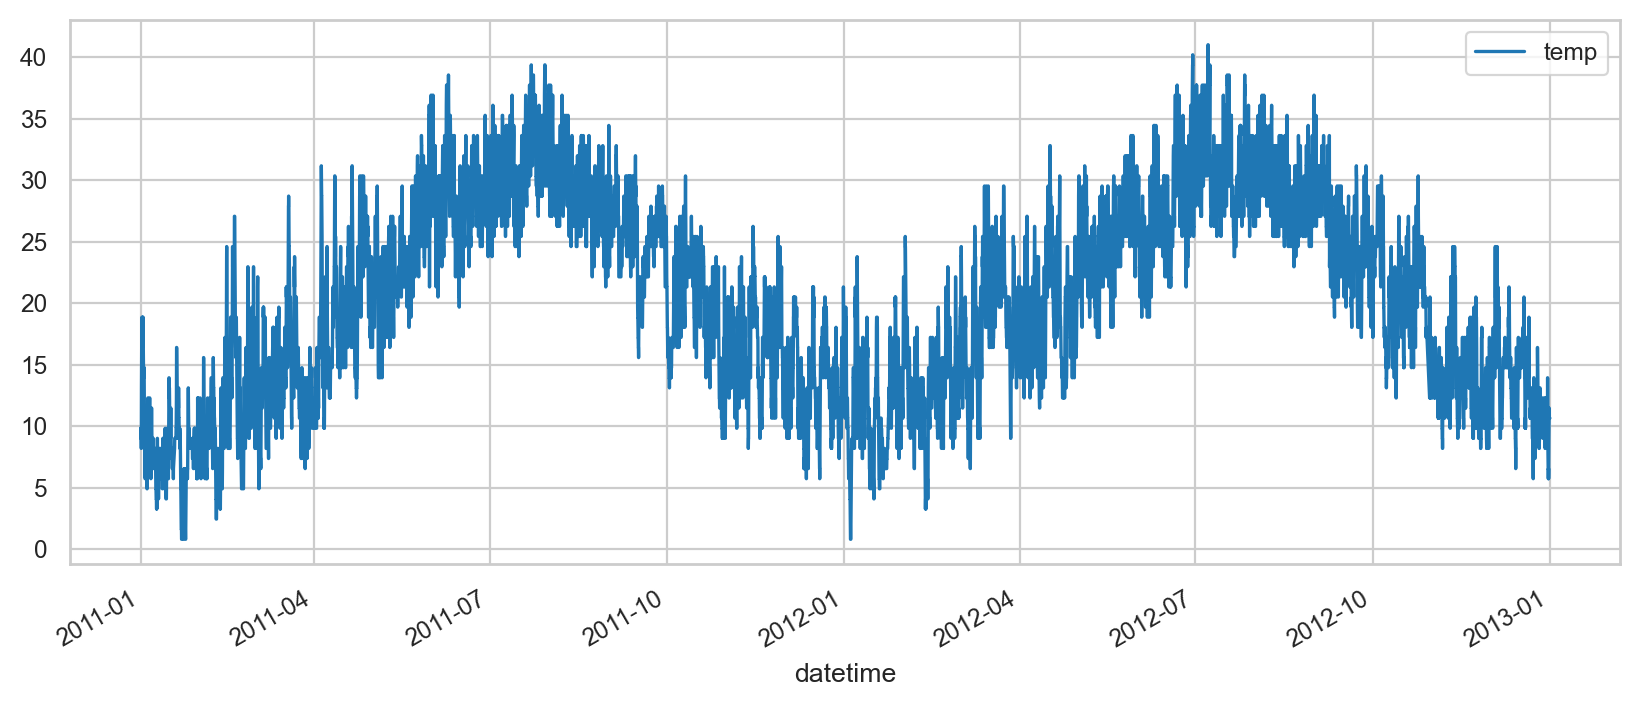

In [13]:
# Average Hourly Temperature
df_temp = df_train_ts.append(df_test_ts)
df_temp.sort_index(inplace=True)
df_temp.plot(figsize=(10, 4))
# df_temp.to_csv('output/hourly_temp.csv')

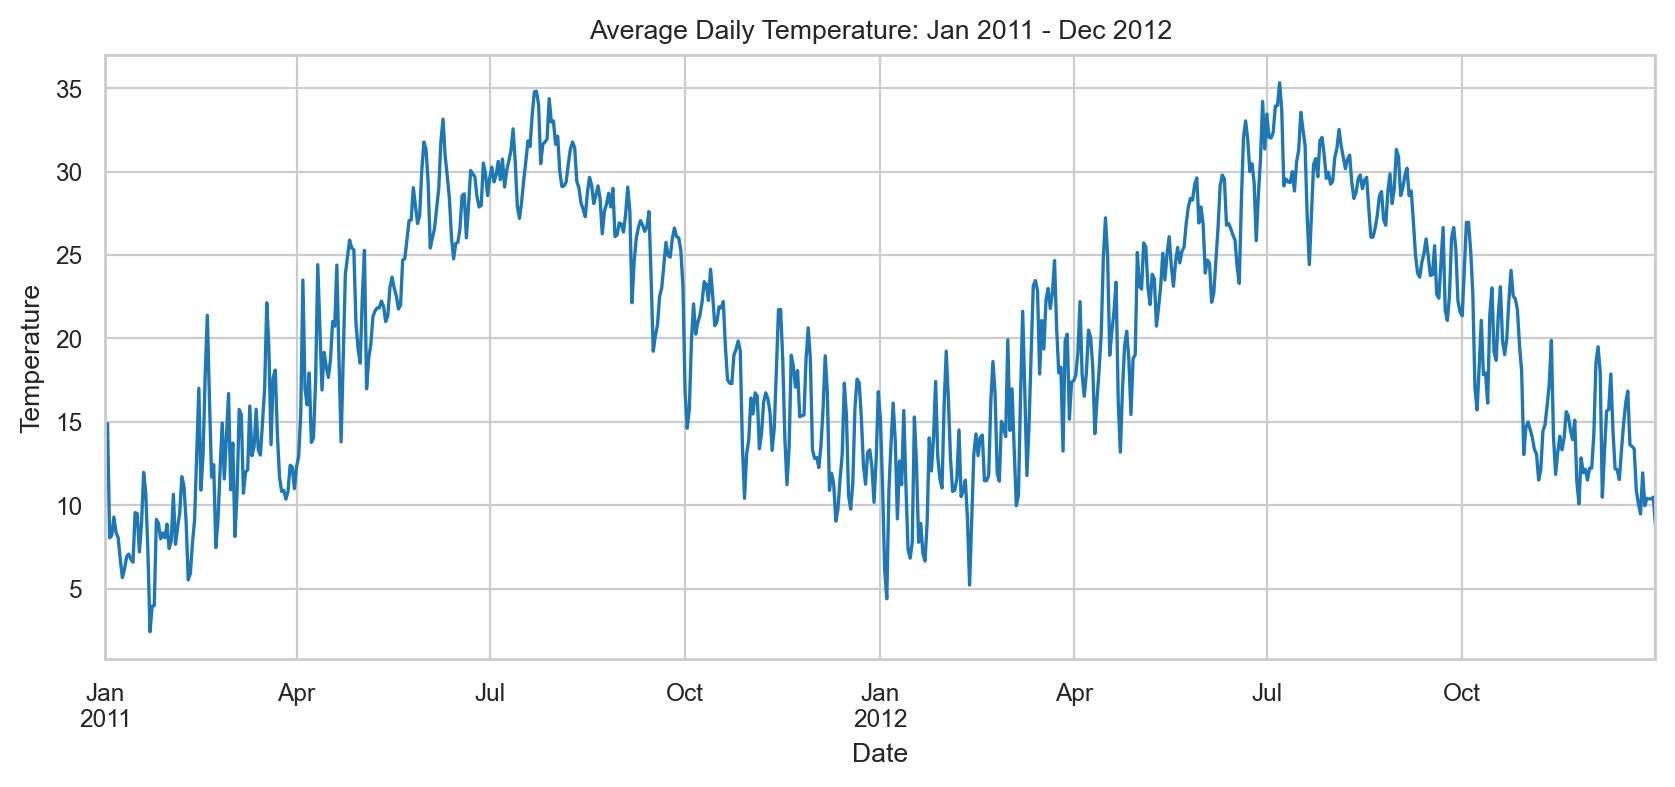

In [14]:
# ================================================================================ 
# Daily temperature data
# ================================================================================ 
df_temp_daily = df_temp.resample("d").mean()
ax = df_temp_daily.plot(figsize=(10, 4), title="Average Daily Temperature: Jan 2011 - Dec 2012", legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
print()
# df_temp_daily.to_csv('output/daily_temp.csv')

By looking at the line chart, we can immediately tell that this time series data is **not stationary**.

***

# Section 1: ARIMA <a name="arima"></a>

## Step 1: Check Stationarity <a name="stationarity"></a>

Check stationarity of the daily temperature data by inspecting the mean and variance at 17 different regions.

## 1.1. Augmented Dickey-Fullter (ADF) Test

We use Augmented Dickey-Fuller test to check stationarity of our time series data.

In [15]:
# ================================================================================ 
# Check stationarity using ADF test
# ================================================================================ 

# Import adfuller() function from statsmodels package.
from statsmodels.tsa.stattools import adfuller

# Define helper function to check stationarity using ADF test.
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    
    # Generate Pandas Series using the result of the ADF test.
    dfoutput = pd.Series(result[0:4], 
                         index=['Test Statistic',
                                'p-value', 
                                'Number of Lags Used', 
                                'Number of Observations Used'])
    display(dfoutput)
    
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    # Print critical values for the test statistics at 1%, 5%, and 10% level. 
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

**Note:** Recall that:

- Null Hypothesis, $H_0$: There is unit root in the time series data - the data is not stationary.
- Alternative Hypothesis, $H_a$: There is no unit root in the time series data - the data is stationary.

#### ADF Test Using (Average) Daily Temperature Data

In [16]:
# ================================================================================ 
# Check stationarity of daily temperature data using the ADF test.
# ================================================================================ 
check_stationarity(df_temp_daily)

Test Statistic                  -1.966226
p-value                          0.301575
Number of Lags Used              6.000000
Number of Observations Used    724.000000
dtype: float64

The test statistic: -1.966226
p-value: 0.301575
Critical Values:
1%: -3.439
5%: -2.866
10%: -2.569


**Note:** The $p$-value is greater than 0.05, indicating that the time series data of the daily temperature is not stationary.

***

# Step 2: Transforming the Time Series Data <a name="differencing"></a>

## 2.1. Differencing the Time Series Data

Apply differencing on the daily temperature data. This is the first order differencing.

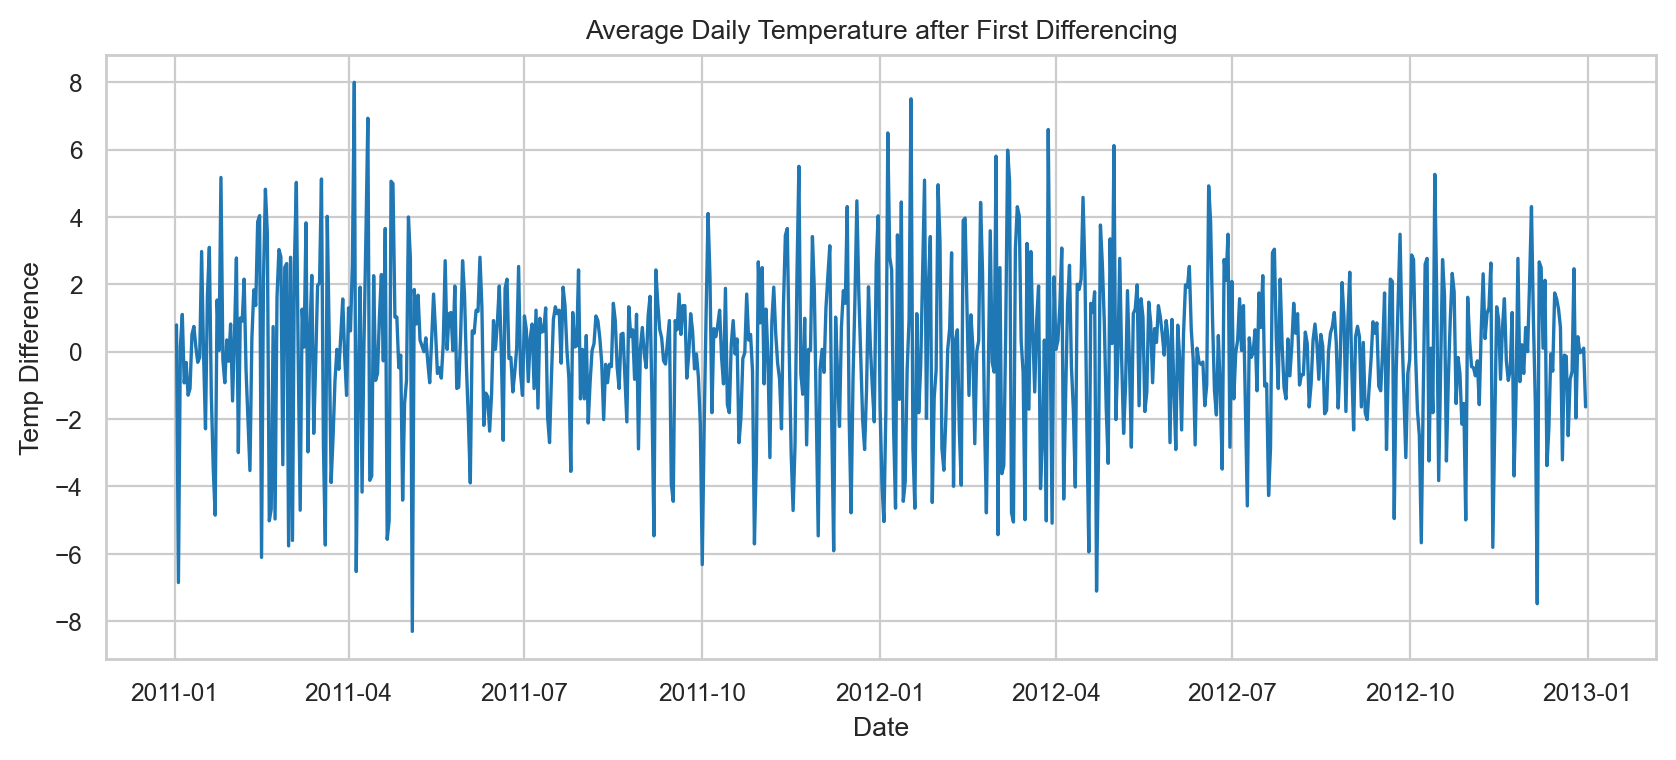

In [17]:
# ================================================================================ 
# Differencing the daily temperature data
# ================================================================================ 
first_diff = np.diff(df_temp_daily[FEATURE])
df_first_diff = pd.DataFrame(first_diff, columns=['First Difference'], index=df_temp_daily.index[1:])

plt.figure(figsize=(10, 4))
plt.title("Average Daily Temperature after First Differencing")
plt.plot(df_first_diff, label="First Difference")

plt.xlabel("Date")
plt.ylabel("Temp Difference")

plt.show()

In [18]:
df_first_diff

First Difference
datetime                    
2011-01-02      7.917754e-01
2011-01-03     -6.851700e+00
2011-01-04      1.490909e-01
2011-01-05      1.105217e+00
2011-01-06     -9.269565e-01
...                      ...
2012-12-27      4.441667e-01
2012-12-28     -3.416667e-02
2012-12-29     -3.552714e-15
2012-12-30      1.025000e-01
2012-12-31     -1.640000e+00

[730 rows x 1 columns]

#### ADF Test using Daily Temperature Data after Differencing

In [19]:
print("[ADF Test]")
print("=== First Difference: Original ===")
check_stationarity(first_diff)

[ADF Test]
=== First Difference: Original ===


Test Statistic                -8.687842e+00
p-value                        4.116934e-14
Number of Lags Used            1.500000e+01
Number of Observations Used    7.140000e+02
dtype: float64

The test statistic: -8.687842
p-value: 0.000000
Critical Values:
1%: -3.440
5%: -2.866
10%: -2.569


**Note:** The $p$-value is less than 0.05, implying that the daily temperature after first differencing is stationary (since we have strong evidence to reject $H_0$).

Therefore, the proper integration order $q$ for the daily temperature data is 1.

***

# Step 3: Determine $p$ and $q$ of ARIMA Model <a name="arima-order"></a>

## 3.1. Determine $p$ and $q$ from the PACF and ACF

We use Autocorrelation (ACF) and Partial Autocorrelation (PACF) to identify the values of $q$ and $p$ of the ARIMA model respectively, where:

- $p$ is the lag order.
- $q$ is the moving average order.

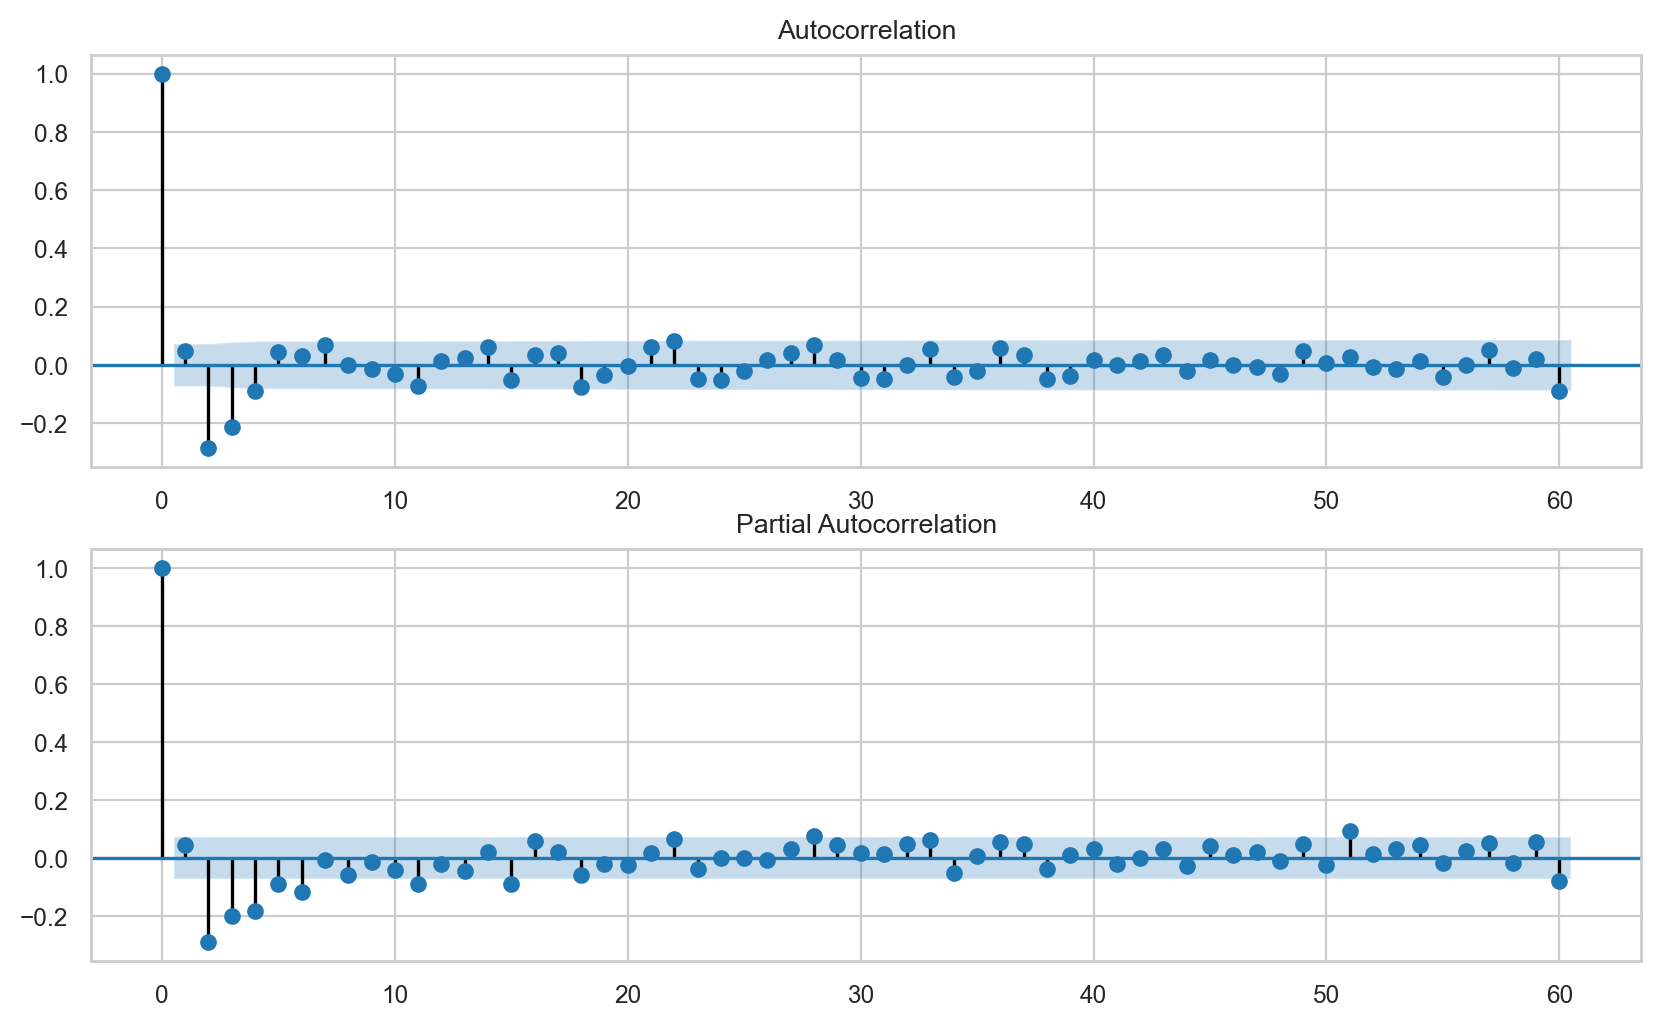

In [20]:
# ================================================================================ 
# PACF and ACF of the daily temperature data
# ================================================================================ 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

temp_diff = first_diff

# Set plot figure size
fig = plt.figure(figsize=(10,6))

# Plot ACF from 'df'
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp_diff, lags=60, ax=ax1)

# Plot PACF from 'df'
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp_diff, lags=60, ax=ax2)

It's difficult to tell which $p$ and $q$ should be used.

- Autocorrelation (ACF): $q$ is roughly 4.
- Partial Autocorrelation (PACF): $p$ is roughly 6.

Therefore, we use [`autoarima`](http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.AutoARIMA.html?highlight=autoarima) function implemented in Python's [`pmdarima`](http://alkaline-ml.com/pmdarima/) package to search for the optimal orders for an ARIMA model to fit the daily temperature data.

## 3.2. Auto ARIMA

Apply Auto ARIMA on the daily temperature data (before first differencing).

In [21]:
# ================================================================================ 
# ARIMA: Determine p, d, q using Auto ARIMA
# ================================================================================ 
import pmdarima as pm
auto_arima_fit = pm.auto_arima(df_temp_daily[FEATURE], 
#                                test='adf',
                               start_p=1, start_q=1,
                               max_p=7, max_q=7, 
                               seasonal=False, # if True: SARIMA; otherwise: ARIMA
                               trace=True, # if True: print debugging information; otherwise: no print
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3280.550, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3350.358, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3350.763, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3348.914, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3348.365, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3215.991, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3288.547, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3217.986, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3217.986, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3224.353, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3260.698, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3218.902, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3213.991, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3278.552, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]          

The best ARIMA model for daily temperature is **ARIMA(2,1,1)** - it has the lowest AIC value.

**Note:** Negative AIC value is smaller, thus better model.

***

# Step 4: Fit an ARIMA Model <a name="arima-fit"></a>

Define ARIMA(2,1,1) model using `ARIMA` implemented in the Python's `statsmodels` package.

In [22]:
import statsmodels

statsmodels.__version__

'0.12.2'

In [23]:
# ================================================================================ 
# ARIMA: Build Model
# ================================================================================ 
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.arima_model import ARIMA

# Generate ARIMA estimator using temperature and specified order: (p, d, q)
mod = ARIMA(df_temp_daily[FEATURE], order=(2, 1, 1), freq='D')

# results = mod.fit(disp=0)
results = mod.fit(disp=0)

# Print the test result of the ARIMA estimator/model
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.temp   No. Observations:                  730
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1602.996
Method:                       css-mle   S.D. of innovations              2.174
Date:                Sun, 13 Jun 2021   AIC                           3215.991
Time:                        18:11:32   BIC                           3238.957
Sample:                    01-02-2011   HQIC                          3224.852
                         - 12-31-2012                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          3.68e-05      0.028      0.001      0.999      -0.054       0.054
ar.L1.D.temp     0.7149      0.047     15.303      0.000       0.623       0.806
ar.L2.D.temp    -0.3217      0.038     -8.54

***

# Step 5: Residual Diagnosis <a name="residual"></a>

A model residuals is *the difference between the predicted and expected value* and can be verified using the fitted model property `resid`.

Residual object is of type `ndarray` so we will store it in a `DataFrame` for plotting.

In the below line plot we don’t see any large residuals and all of them are within their upper and lower limits.

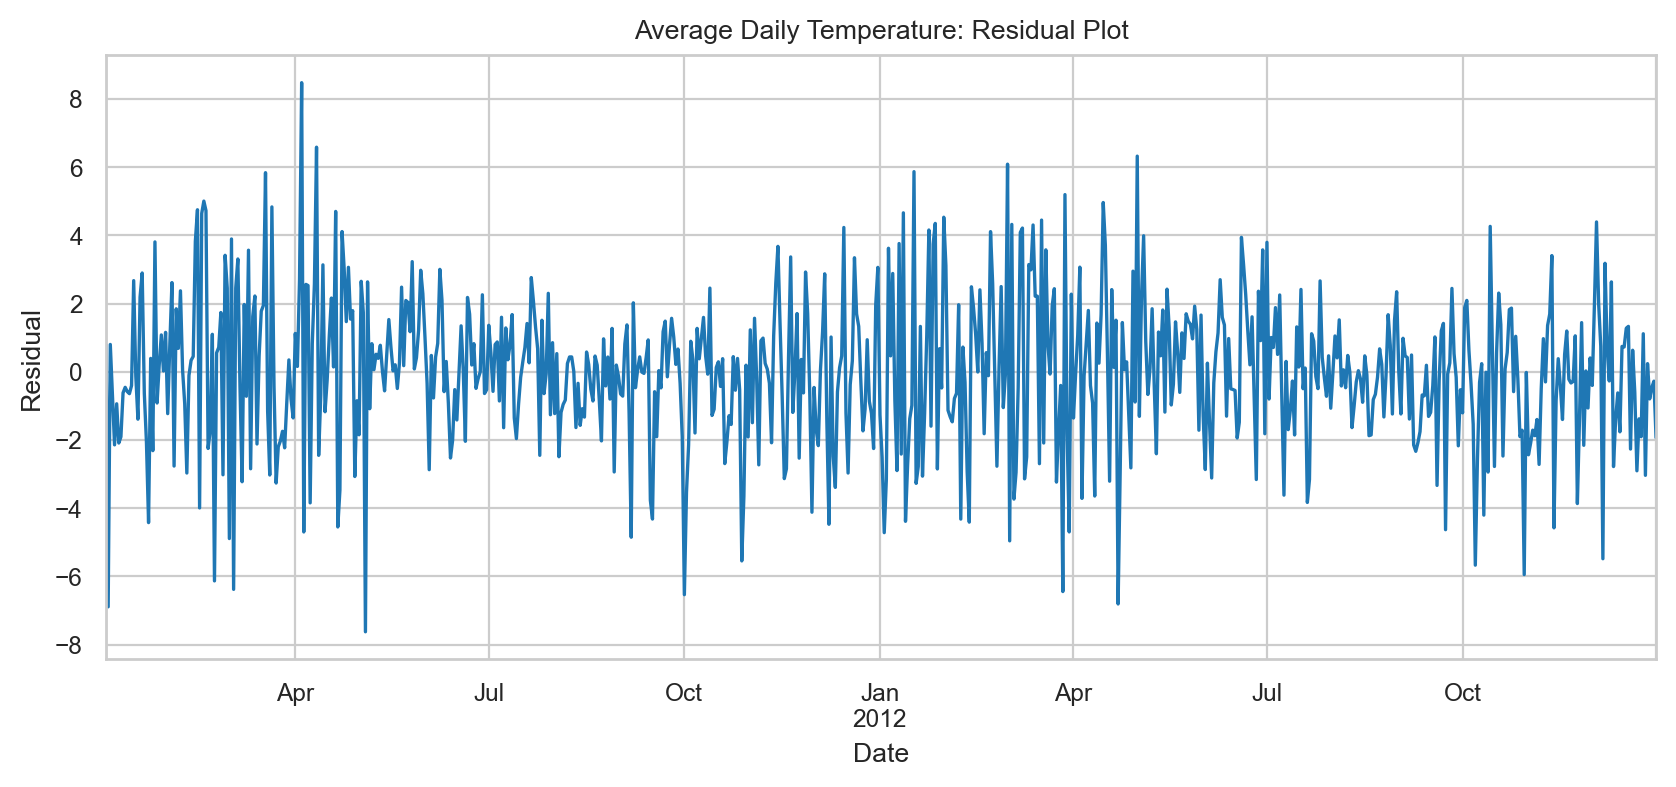

In [24]:
# ================================================================================ 
# ARIMA: Residual plot
# ================================================================================ 
residuals = pd.DataFrame(results.resid, columns=['Residuals'])
ax = residuals.plot(figsize=(10, 4), title="Average Daily Temperature: Residual Plot", legend=False)
ax.set_xlabel("Date")
ax.set_ylabel("Residual")
print()

Next we will check if these residuals are normally distributed and looks Gaussian or not. So we will plot the density plot to check this. This looks normal with a long left tail and centered at zero.

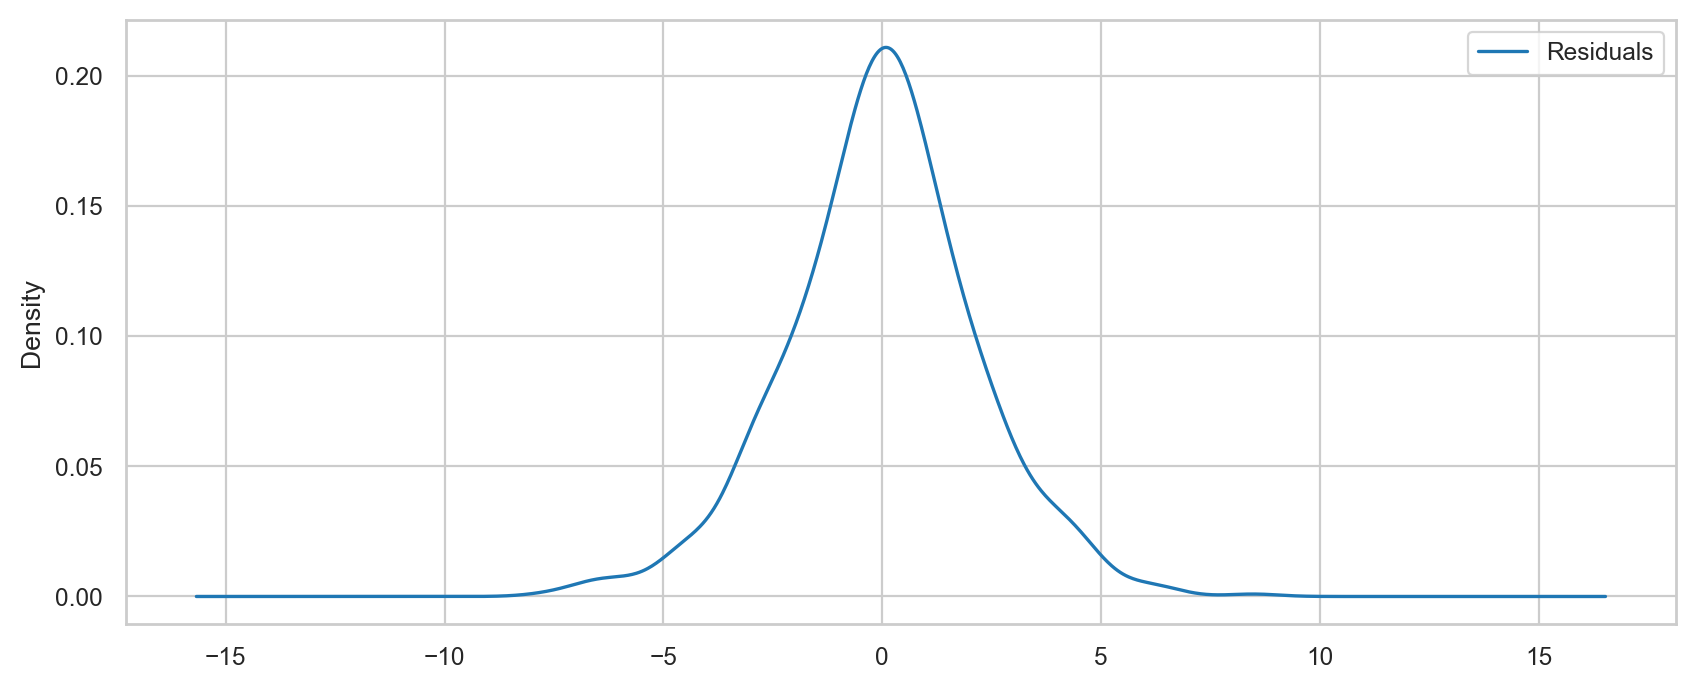

In [25]:
residuals.plot(kind='kde', figsize=(10, 4))

The mean of the residual is close to zero and there is no significant correlation also that we can see in the PACF plot for residuals.

Residuals
count  730.000000
mean    -0.009347
std      2.178097
min     -7.621418
25%     -1.276494
50%      0.033653
75%      1.275451
max      8.474293

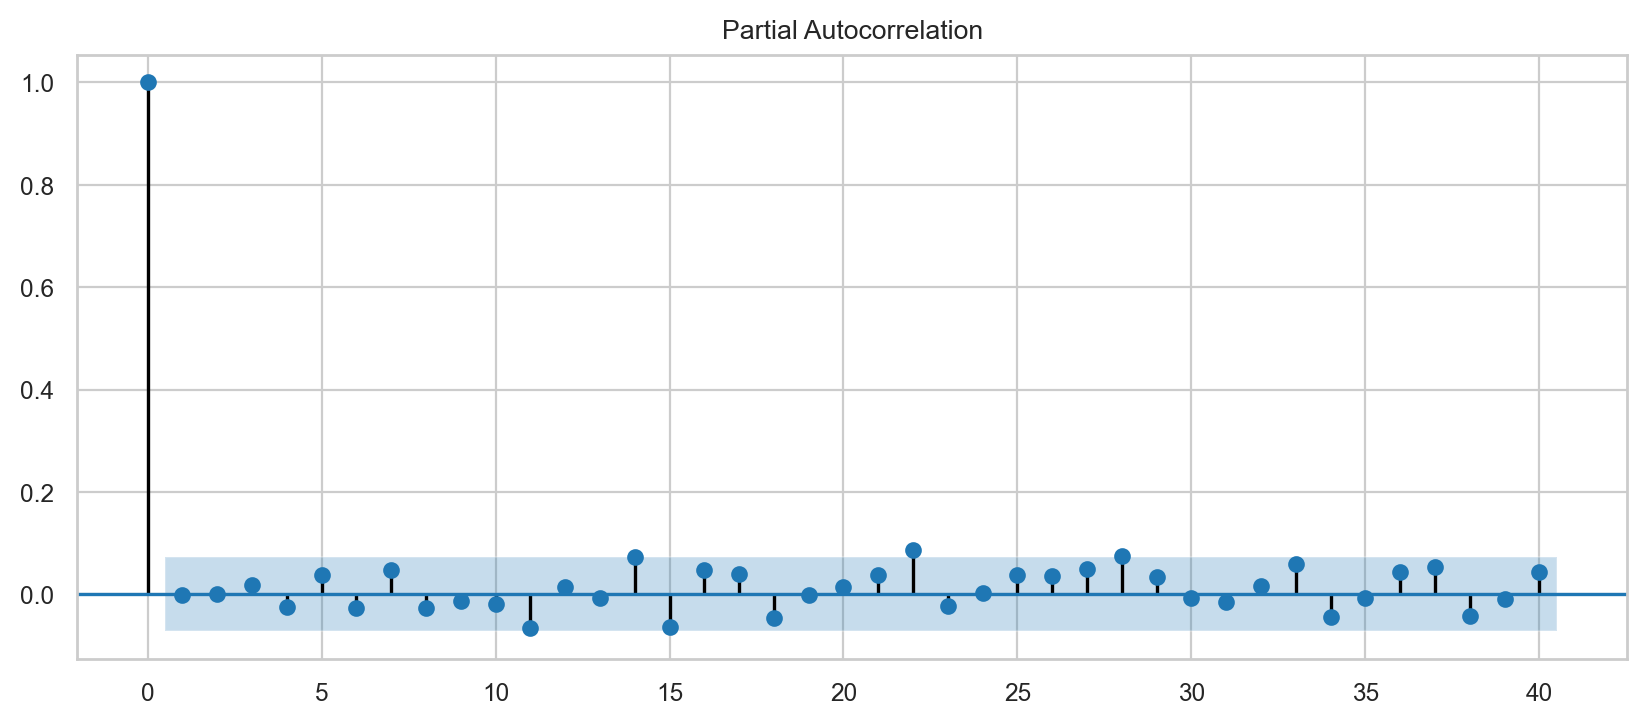

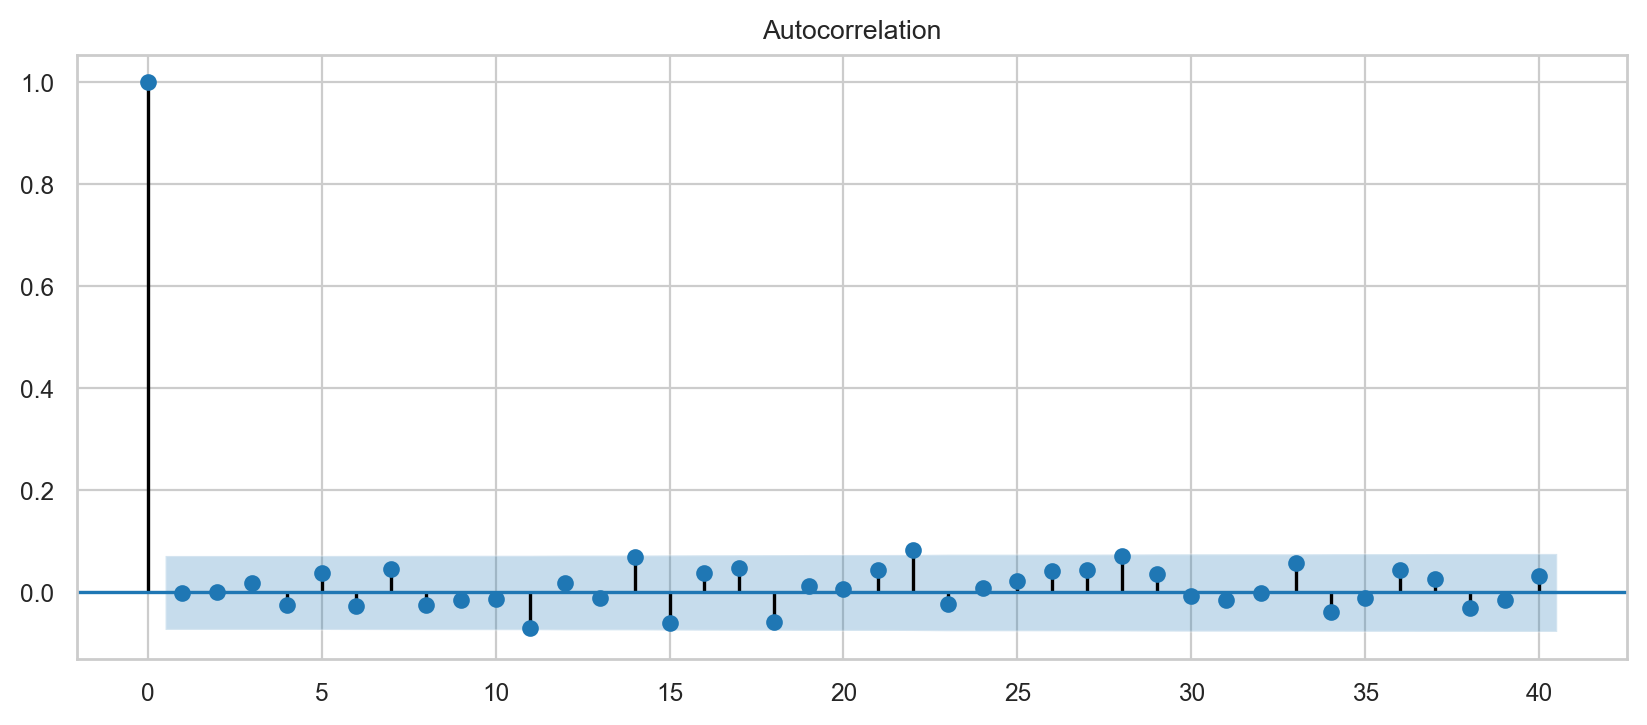

In [26]:
# ================================================================================ 
# ARIMA: ACF and PACF of the residual
# ================================================================================ 
display(residuals.describe())
# plt.figure(figsize=(10, 4))

plt.rc("figure", figsize=(10, 4))
plot_pacf(residuals, lags=40)
plot_acf(residuals, lags=40)
print()

The residual diagnostics looks like a white noise since 95% of our sample autocorrelations is within the blue shaded region and it meets all our criteria for a good forecast and prediction.

So let’s go ahead and evaluate the predicted and expected values.

***

# Step 6: ARIMA Predict <a name="arima-predict"></a>

Predict the daily temperatures using the ARIMA model. The actual and predicted temperatures for the **first 660 days** are plotted for comparison (`days_pred`).

**Note:** When the integration order $d$ of the ARIMA model is not 0, the `predict()` function returns the predicted $d$-order differencing values.

Therefore, upon plotting the predicted temperatures by the ARIMA model, the predicted values are added back to the values of the first differencing.

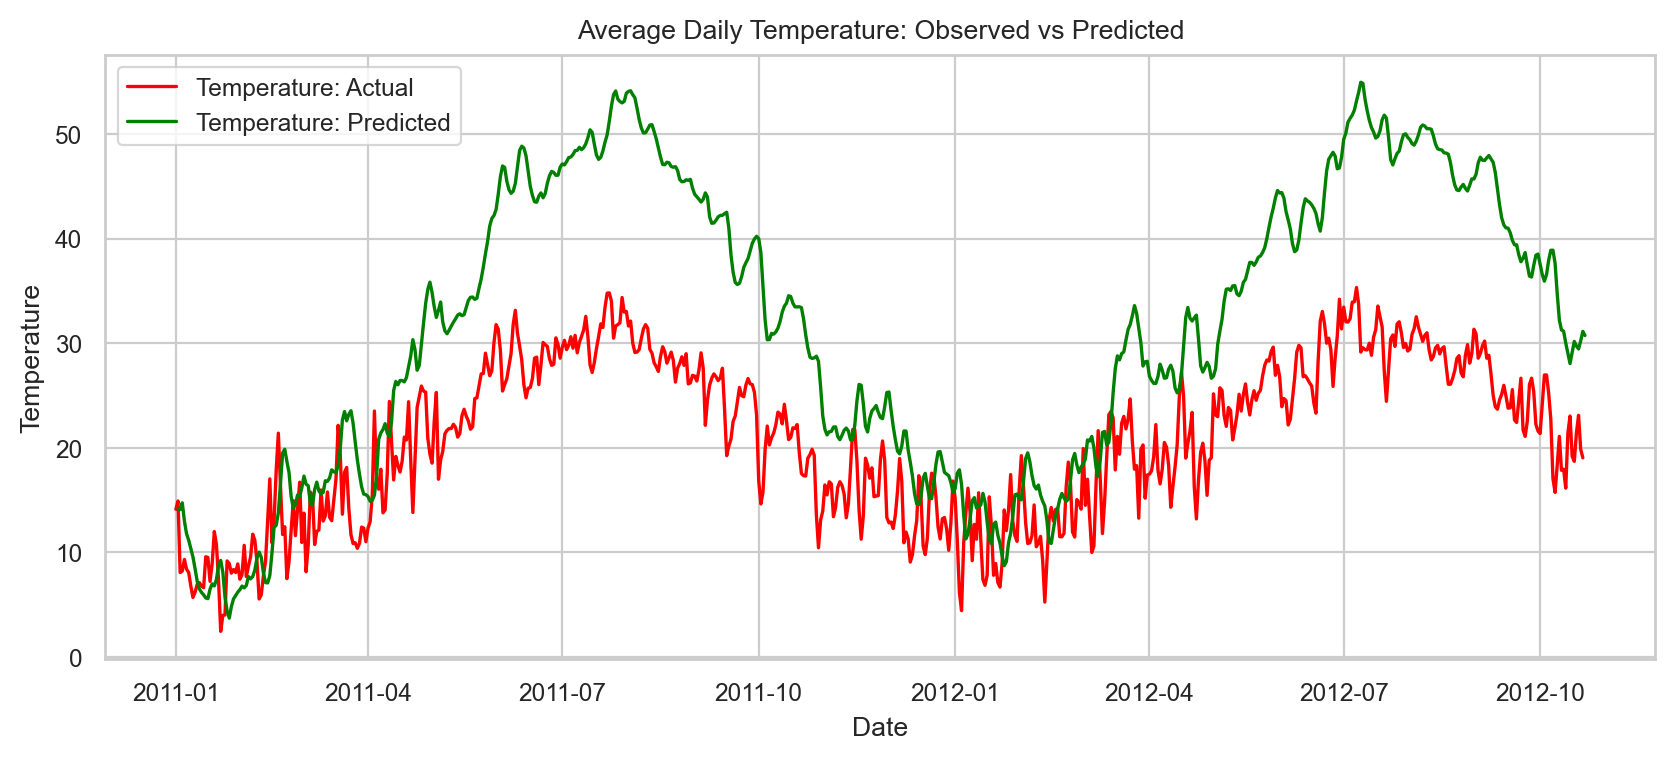

In [27]:
# ================================================================================ 
# ARIMA: Original and Predicted Plot
# ================================================================================ 
from math import sqrt
from sklearn.metrics import mean_squared_error

days_pred = 660

plt.figure(figsize=(10, 4))

# The first value from the original data.
temp_pred = [df_temp_daily[FEATURE][0]]

for diff in results.predict().values:
    temp_new = temp_pred[-1] - diff
    temp_pred.append(temp_new)
    
temp_pred_series = pd.Series(temp_pred[1:], index=results.predict().index)
# print(len(temp_pred))

# Plot temperatures: before reverse transform
plt.plot(df_temp_daily[FEATURE][:days_pred], label='Temperature: Actual', color='r')
# plt.plot(results.predict(1, days_pred) + temp_pred[1:days_pred+1], label='Temperature: Predicted', color='g') # Predict the difference
plt.plot(temp_pred_series[:days_pred], label='Temperature: Predicted', color='g') # Predict the difference

plt.title("Average Daily Temperature: Observed vs Predicted")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Step 7: ARIMA Forecast <a name="arima-forecast"></a>

Forecast the daily temperature from 1 - 20 Jan 2013 (20 days) using ARIMA(2,1,1) model.

In [28]:
# type(results)

In [29]:
# ================================================================================ 
# ARIMA: Forecast values
# ================================================================================ 
# # Set # months (20 days)
n = 20

# Generate forecast for the next 3 years
forecast, err, ci = results.forecast(steps=n)

# Create new Dataframe using forecast value from 1 Jan 2020.
df_forecast = pd.DataFrame({'forecast': forecast}, 
                           index=pd.date_range(start='1/1/2013', periods=n, freq='D'))

print(df_forecast.head(20))

df_forecast.shape

             forecast
2013-01-01   9.173129
2013-01-02   9.932334
2013-01-03  10.370918
2013-01-04  10.440267
2013-01-05  10.348781
2013-01-06  10.261089
2013-01-07  10.227847
2013-01-08  10.232314
2013-01-09  10.246223
2013-01-10  10.254753
2013-01-11  10.256399
2013-01-12  10.254854
2013-01-13  10.253242
2013-01-14  10.252609
2013-01-15  10.252698
2013-01-16  10.252987
2013-01-17  10.253187
2013-01-18  10.253260
2013-01-19  10.253270
2013-01-20  10.253276


(20, 1)

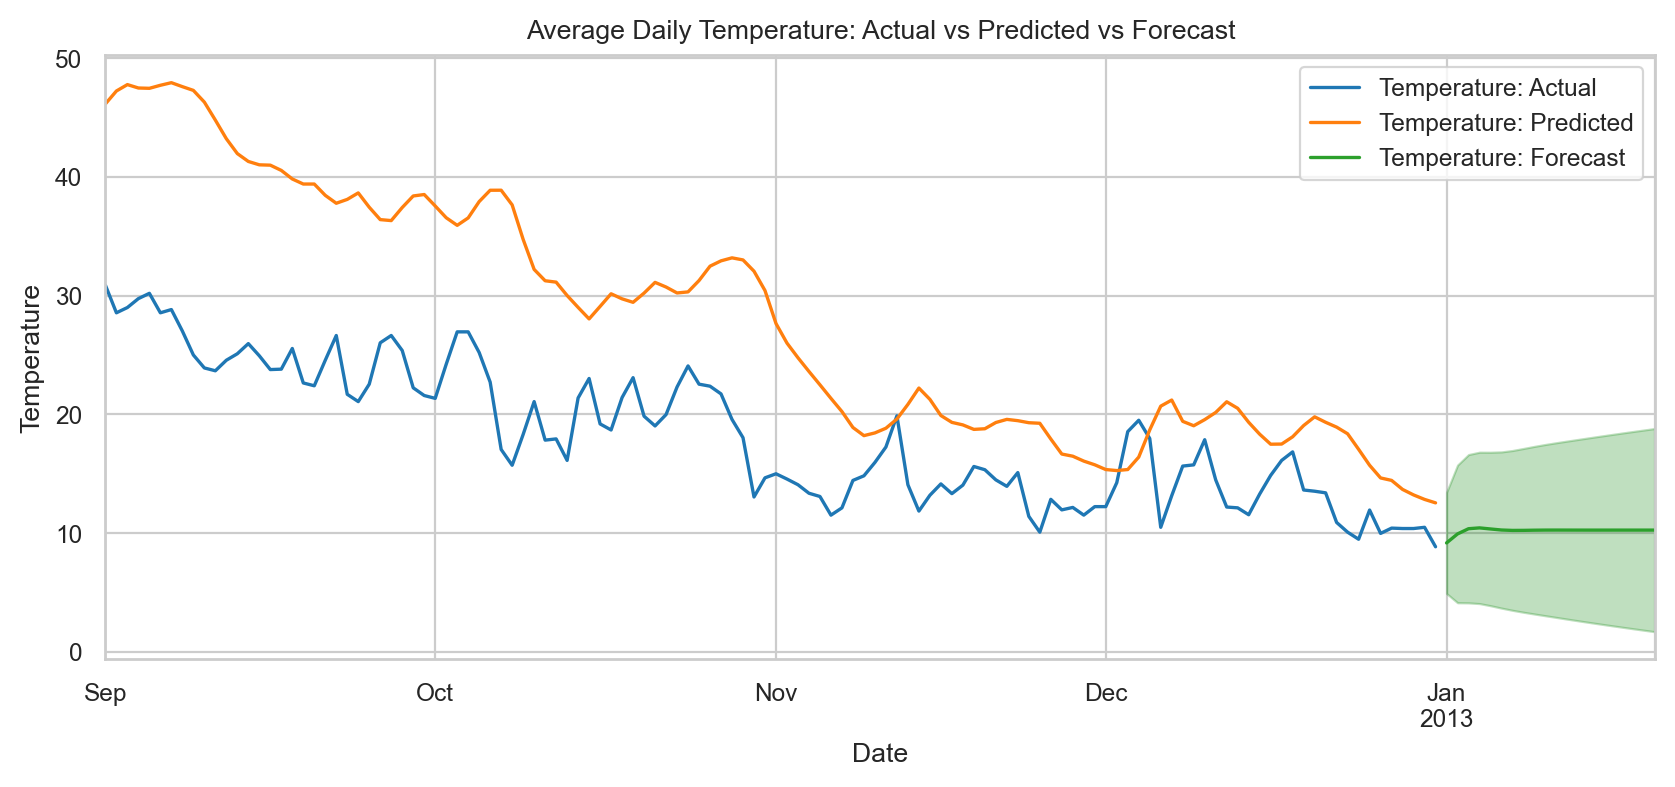

In [30]:
# ================================================================================ 
# ARIMA: Forecast Plot
# ================================================================================ 
# Plot actual data from the 1,600th record.
date_sep = '2012-09-01'
num_days_since_sep_01 = df_temp_daily[df_temp_daily.index >= date_sep].shape[0]

ax = df_temp_daily[FEATURE][-num_days_since_sep_01:].plot(label='Temperature: Actual', figsize=(10, 4))
ax = temp_pred_series[-num_days_since_sep_01:].plot(ax=ax, label='Temperature: Predicted')
df_forecast.plot(ax=ax, label='Temperature: Forecast')

# Plot confidence interval (if not NaN, when p-value > 0.05)
ax.fill_between(df_forecast.index,
                ci[:, 0], ci[:, 1], 
                color='g', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

plt.title("Average Daily Temperature: Actual vs Predicted vs Forecast")
plt.legend(['Temperature: Actual', 'Temperature: Predicted', 'Temperature: Forecast'])
plt.show()

Check different types of errors generated by the ARIMA model when predicting daily temperatures.

#### MAE: Mean absolute error
$$\text{MAE} = \frac{1}{N}\sum_{i=1}^N{\left|y_{true} - y_{pred}\right|}$$

#### MRE: Mean relative error
$$\text{MRE} = \frac{1}{N}\sum_{i=1}^N{\left|\frac{y_{true} - y_{pred}}{y_{true}}\right|}$$

#### MSE: Mean squared error
$$\text{MSE} = \frac{1}{N}\sum_{i=1}^N{\left(y_{true} - y_{pred}\right)^2}$$

#### RMSE: Root mean squared error
$$\text{RMSE} = \sqrt{\text{MSE}}$$

In [31]:
# ================================================================================ 
# ARIMA: RMSE and MSE
# ================================================================================ 

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse

# date_sep = '2012-09-01'

# Relative error
def mean_relative_error(y_true, y_pred,):
    import numpy as np
    relative_error = np.average(np.abs(y_true - y_pred) / y_true, axis=0)
    return relative_error

# mae_calc = mean_absolute_error(df_temp_daily[FEATURE][1:], temp_pred_series)
# mre_calc = mean_relative_error(df_temp_daily[FEATURE][1:], temp_pred_series)
# mse_calc = mean_squared_error(df_temp_daily[FEATURE][1:], temp_pred_series)
# rmse_calc = rmse(df_temp_daily[FEATURE][1:], temp_pred_series)

num_days = df_temp_daily.shape[0]
num_days_since_sep_01 = df_temp_daily[df_temp_daily.index >= date_sep].shape[0]

temp_true = df_temp_daily[FEATURE][-num_days_since_sep_01:]
temp_pred = temp_pred_series[-num_days_since_sep_01:]

mae_calc = mean_absolute_error(temp_true, temp_pred)
mre_calc = mean_relative_error(temp_true, temp_pred)
mse_calc = mean_squared_error(temp_true, temp_pred)
rmse_calc = rmse(temp_true, temp_pred)

print('MAE: ', mae_calc)
print('MRE: ', mre_calc)
print('MSE: ', mse_calc)
print('RMSE:', rmse_calc)

MAE:  9.924519347432767
MRE:  0.5410133953708663
MSE:  132.13868239184018
RMSE: 11.495159085103614


***

# Section 2: SARIMAX (Seasonal ARIMA Exogenous) <a name="sarimax"></a>

SARIMAX is a variation of ARIMA, which helps to handle the seasonality components in the time series data. In this assignment, a SARIMAX model is also built to fit the daily temperature data - which is treated under the category of ARIMA model.

***

## Step 1: Determine Orders for SARIMAX Model using Auto ARIMA <a name="sarimax-order"></a>

Set `m=7` for daily temperature data - implying the weekly (7-day) seasonality within the daily temperature data.

In [32]:
# ================================================================================ 
# SARIMAX: Determine orders using Auto ARIMA
# ================================================================================ 
Sarimax_model = pm.auto_arima(df_temp_daily[FEATURE],
                              start_P=1, start_q=1,
                              max_p=3, max_q=3,
                              m=7,
                              seasonal=True,
                              d=None,
                              D=1,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=3313.406, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=4033.213, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3456.928, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3476.326, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=4031.214, Time=0.02 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=3312.409, Time=0.38 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=3582.962, Time=0.18 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=3313.355, Time=0.72 sec
 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=3401.793, Time=0.28 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=3315.551, Time=0.88 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=3315.504, Time=0.25 sec
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=3326.118, Time=0.23 sec
 ARIMA(3,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=3

The best SARIMAX model for daily temperature (for `m=7`) is **SARIMAX(2,0,1)(0,1,1,7)** - again, it has the lowest AIC value.

***

# Step 2: Fit SARIMAX Model <a name="sarimax-fit"></a>

Define **SARIMAX(2,0,1)(0,1,1,7)** model using `ARIMA` implemented in the Python's `statsmodels` package.
- Set `order=(2,0,1)`
- Set `seasonal_order=(0,1,1,7)`

In [33]:
# ================================================================================ 
# SARIMAX: Build model
# ================================================================================ 
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_temp_daily[FEATURE], order=(2, 0, 1),
              seasonal_order=(0, 1, 1, 7),
              enforce_stationarity=False,
              enforce_invertibility=False)

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              temp   No. Observations:                  731
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1628.022
Date:                           Sun, 13 Jun 2021   AIC                           3266.043
Time:                                   18:11:50   BIC                           3288.905
Sample:                               01-01-2011   HQIC                          3274.872
                                    - 12-31-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4472      0.124      3.599      0.000       0.204       0.691
ar.L2          0.2470      0.113      2.187

***

# Step 3: Residual Diagnosis (SARIMAX) <a name="sarimax-residual"></a>

Using the same steps in [ARIMA Step 5](#residual), the residual, ACF and PACF of the SARIMAX model are plotted.

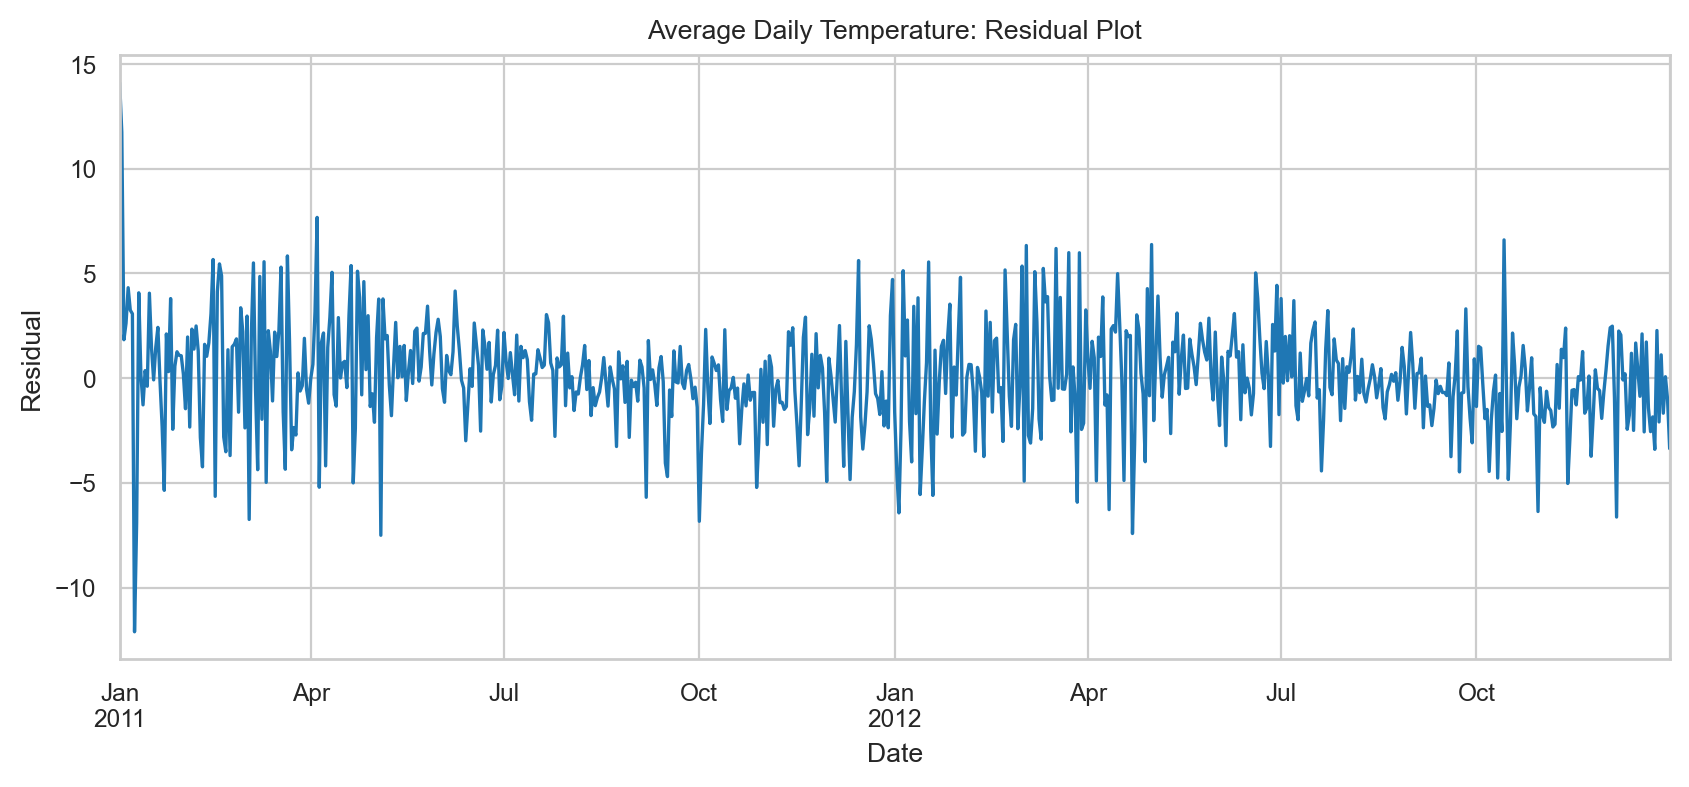

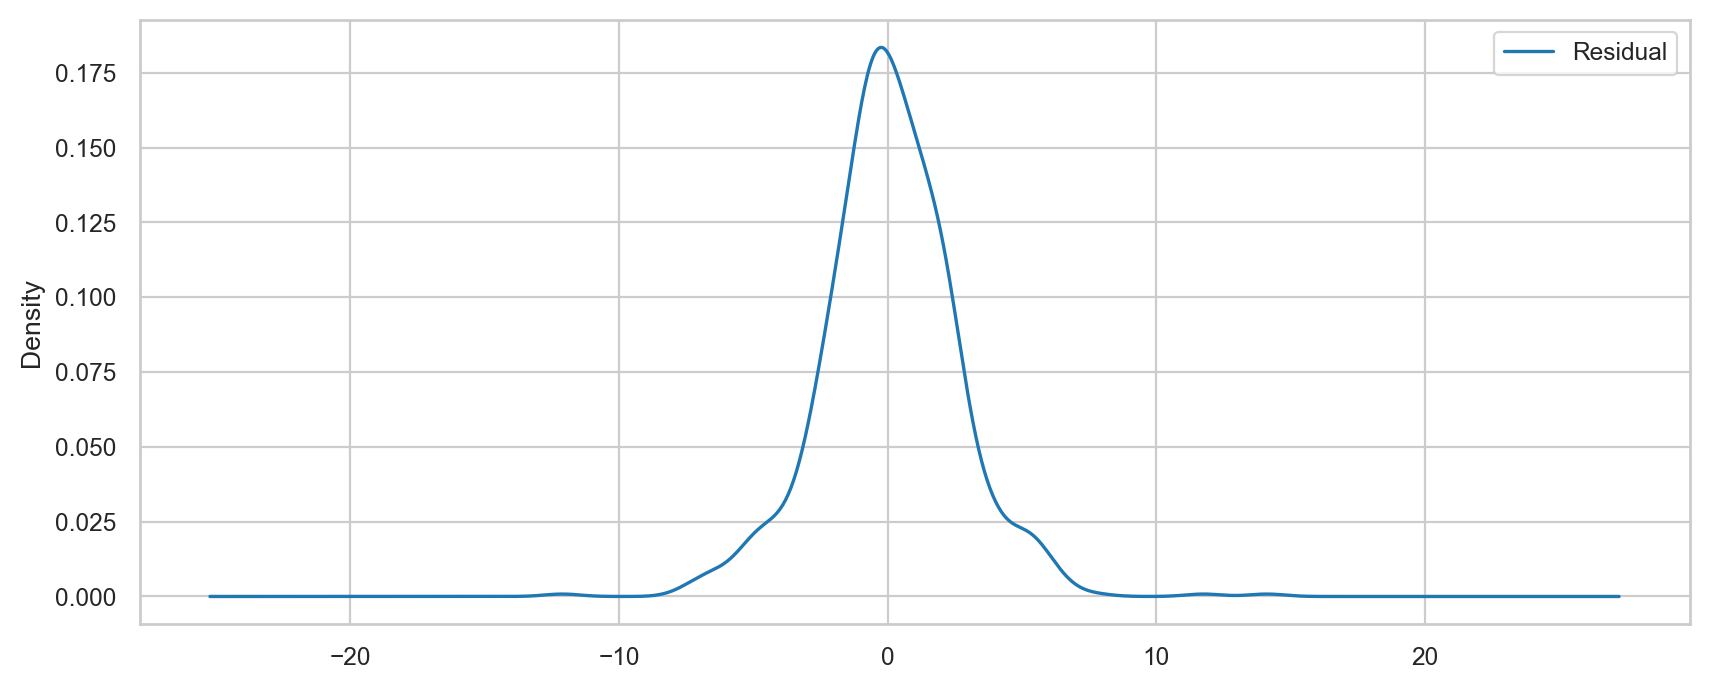

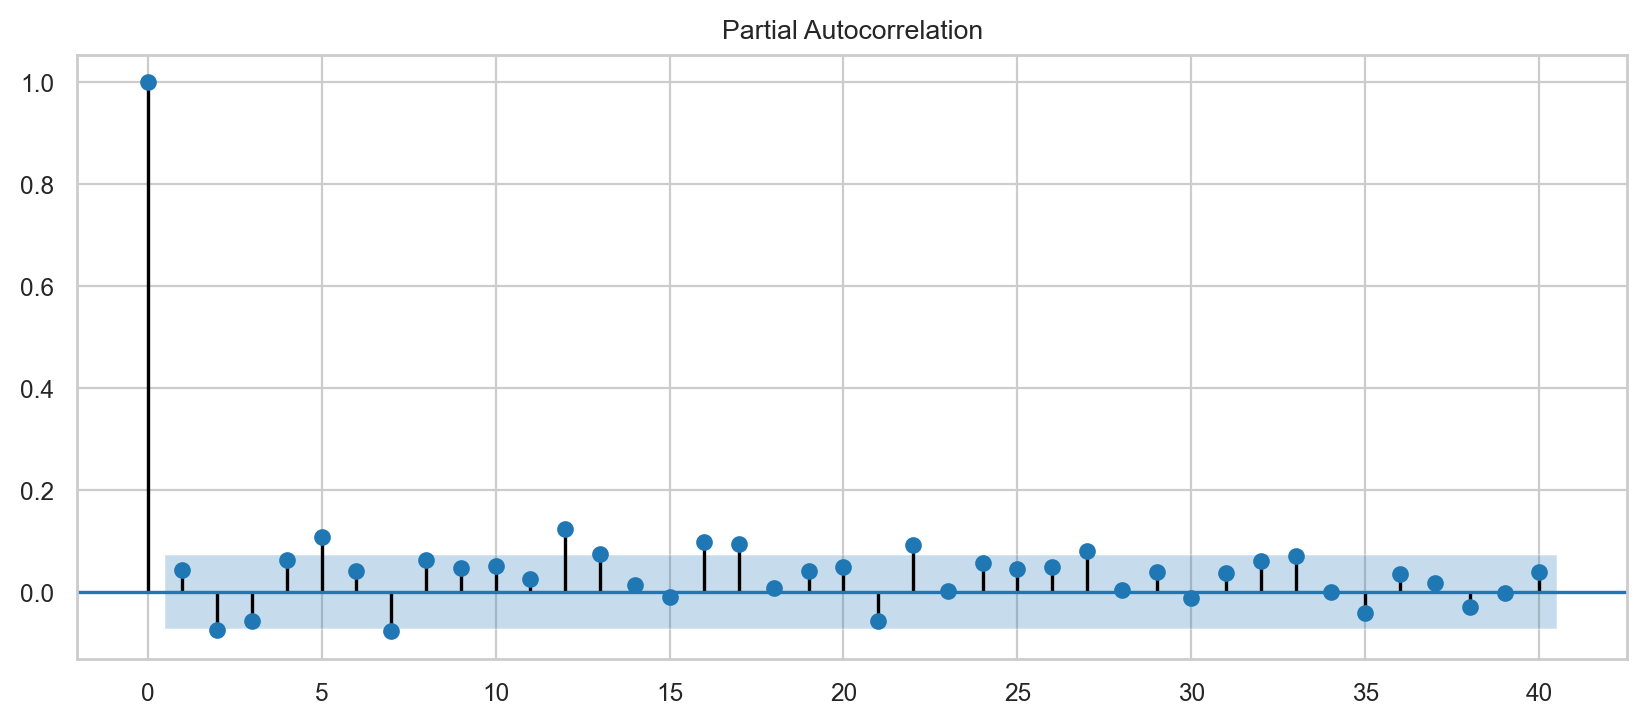

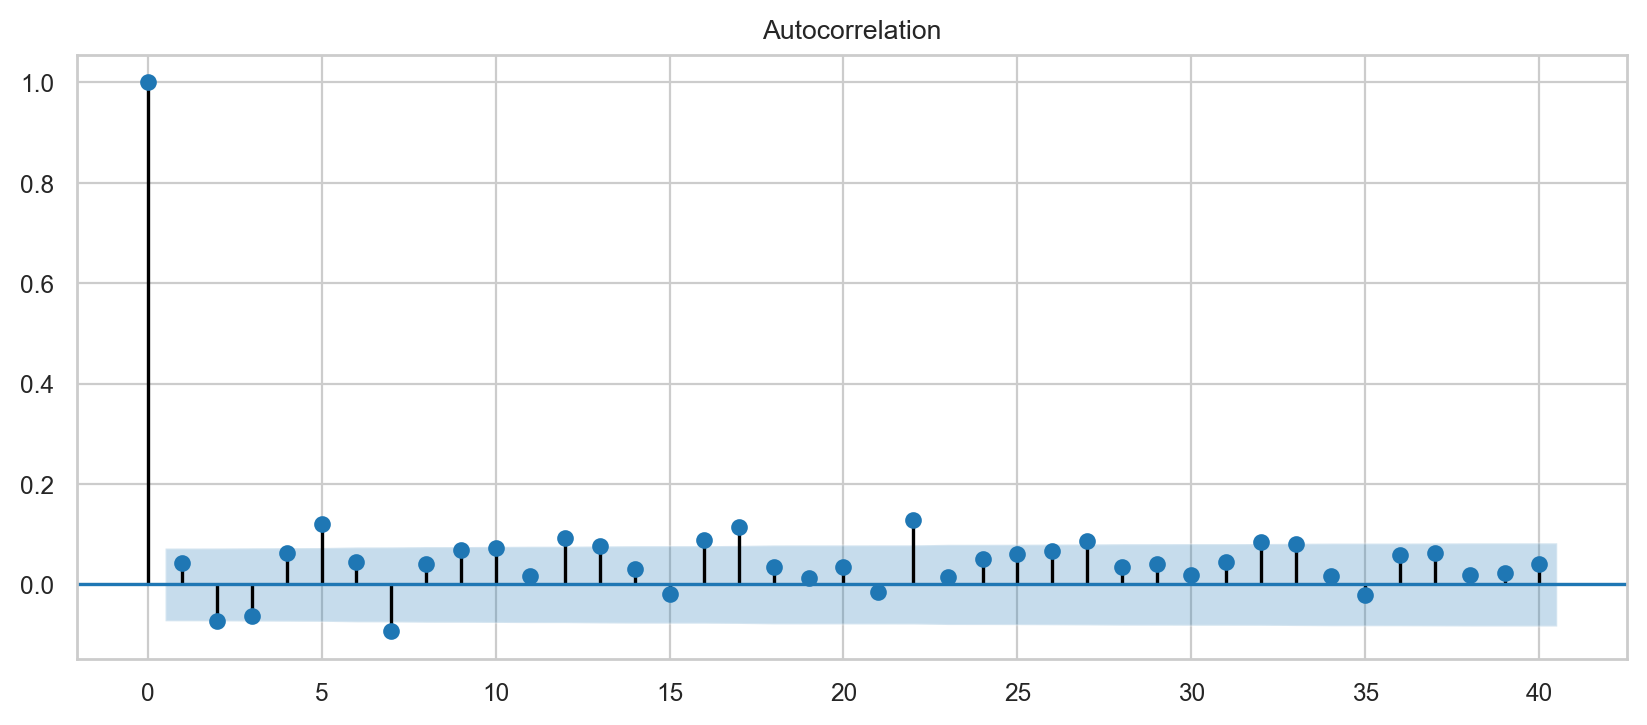

In [34]:
# ================================================================================ 
# SARIMAX: Residual plot
# ================================================================================ 
residuals = pd.DataFrame(results.resid, columns=['Residual'])
ax = residuals.plot(figsize=(10, 4), title="Average Daily Temperature: Residual Plot", legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Residual')

residuals.plot(kind='kde')

plt.rc("figure", figsize=(10, 4))

plot_pacf(residuals, lags=40)
plot_acf(residuals, lags=40)

print()

The residual diagnostics looks like a white noise since 95% of our sample autocorrelations is within (or very close) the blue shaded region and it meets all our criteria for a good forecast and prediction.

***

# Step 4: SARIMAX Predict <a name="sarimax-predict"></a>

Predict the daily temperatures using the SARIMAX model. The actual and predicted temperatures for the **first 660 days** are plotted for comparison (`days_pred`).

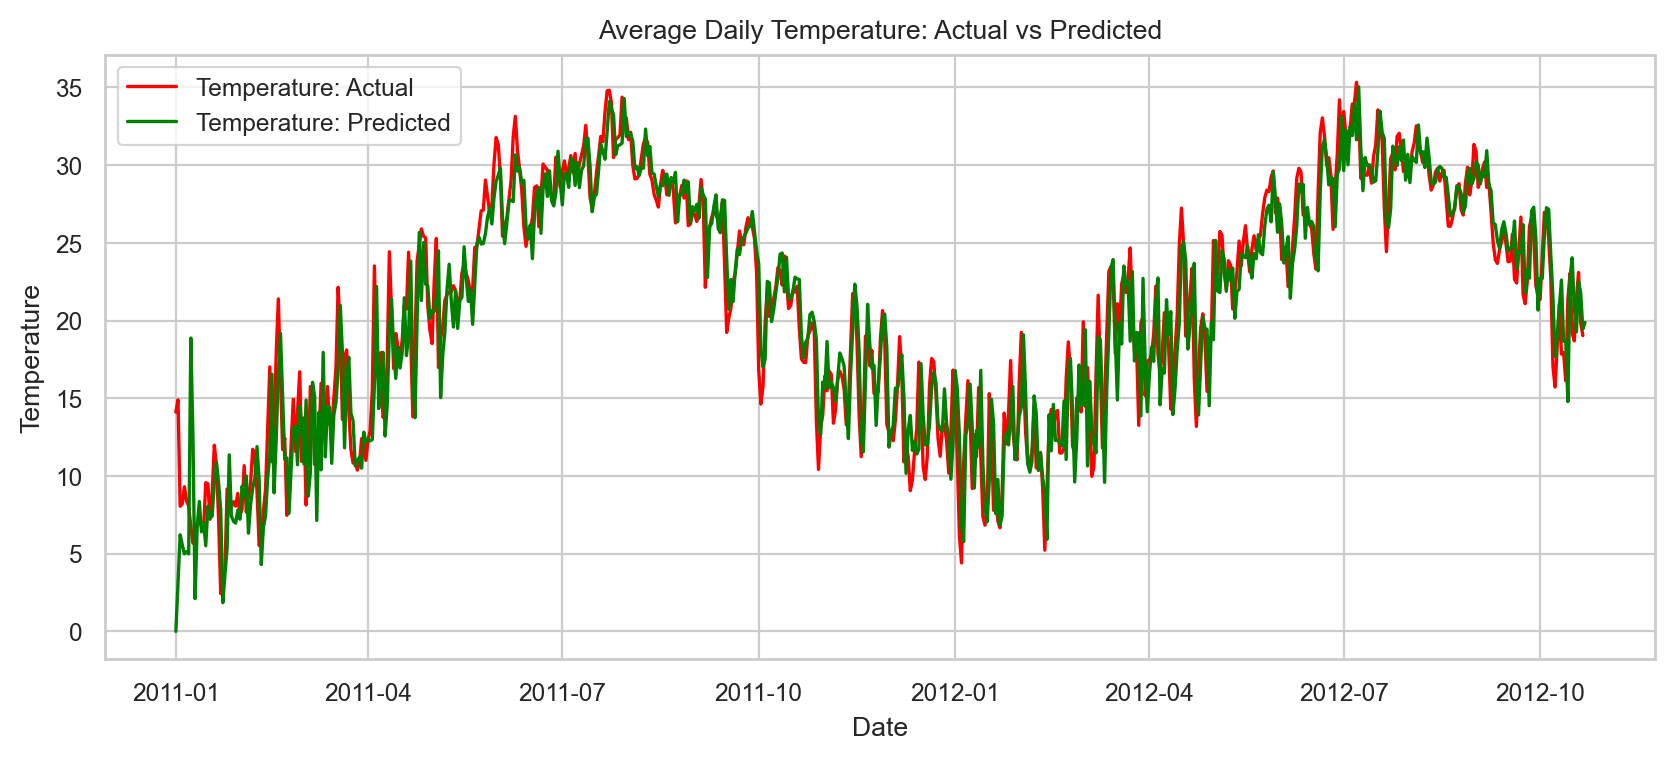

In [35]:
# ================================================================================ 
# SARIMAX: Original and Predicted Plot
# ================================================================================ 
days_pred = 660

plt.figure(figsize=(10, 4))

plt.plot(df_temp_daily[FEATURE][:days_pred], label='Temperature: Actual', color='r')
plt.plot(results.predict(0, days_pred), label='Temperature: Predicted', color='g' )
plt.title("Average Daily Temperature: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Temperature")

plt.legend()
plt.show()

***

# Step 5: SARIMAX Forecast <a name="sarimax-forecast"></a>

Forecast the daily temperature from 1 - 24 Jan 2013 (24 days) using the SARIMAX model.

In [36]:
# ================================================================================ 
# SARIMAX: Forecast values
# ================================================================================ 
forecast = results.predict(start=len(df_temp_daily[FEATURE]),
                           end=len(df_temp_daily[FEATURE])+24,
                           typ='levels').rename('data sarimax (1,0,1) forecast')

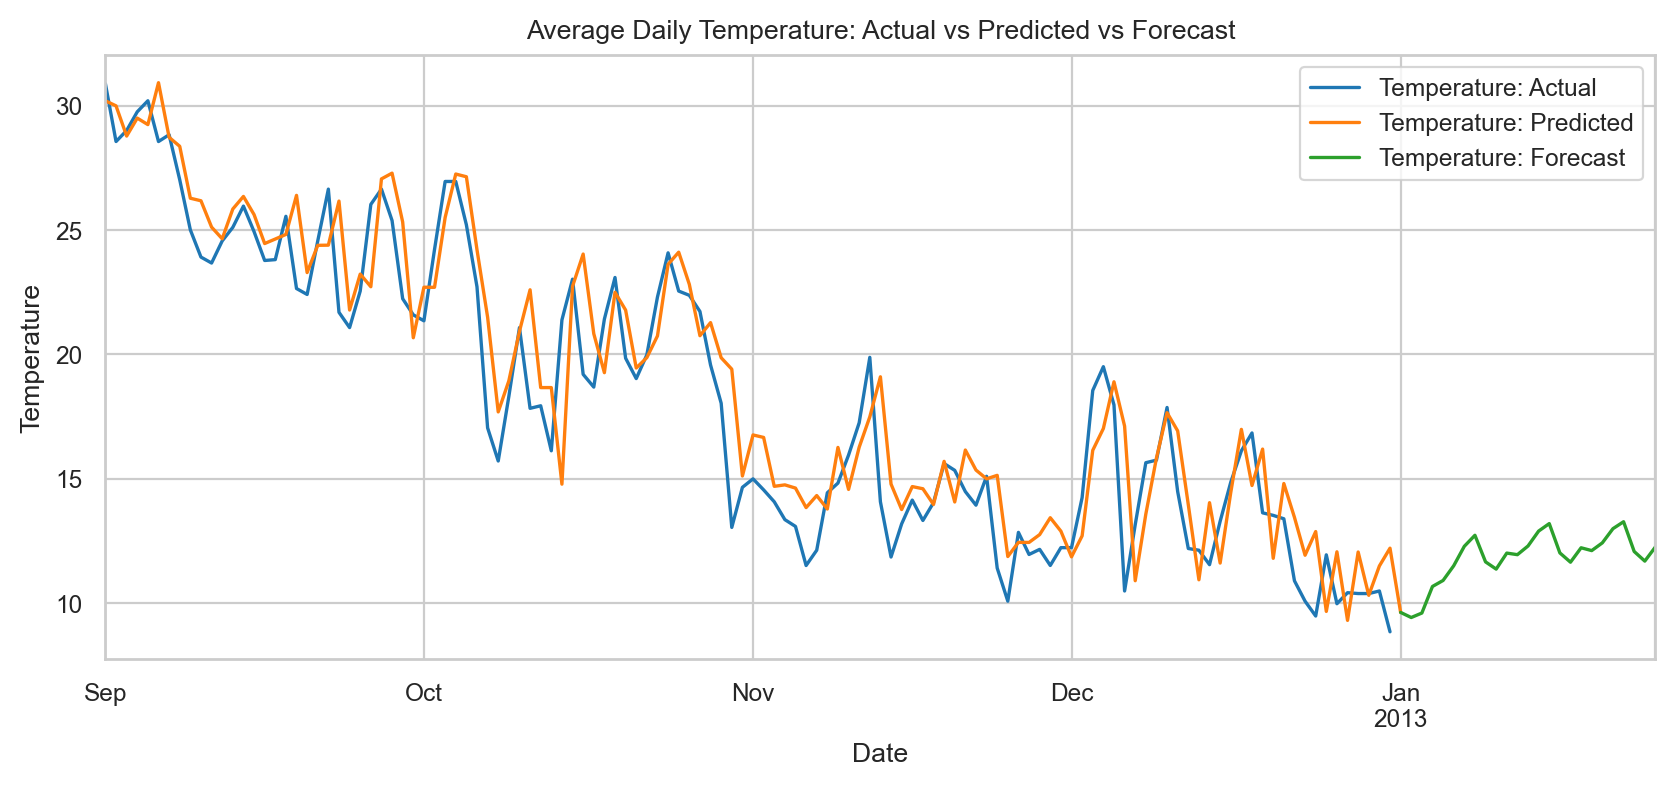

In [37]:
# ================================================================================ 
# SARIMAX: Forecast plot
# ================================================================================
date_sep = '2012-09-01'
num_days_since_sep_01 = df_temp_daily[df_temp_daily.index >= date_sep].shape[0]
num_days = df_temp_daily.shape[0]

ax = df_temp_daily[FEATURE][-num_days_since_sep_01:].plot(figsize=(10, 4), legend=True, label='Temperature: Actual')
ax = results.predict(num_days-num_days_since_sep_01, num_days).plot(ax=ax, legend=True, label='Temperature: Predicted')
ax = forecast.plot(ax=ax, legend=True, label='Temperature: Forecast')
ax.set_title("Average Daily Temperature: Actual vs Predicted vs Forecast")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

print()

Check different types of errors generated by the ARIMA model when predicting daily temperatures.

In [38]:
# ================================================================================ 
# SARIMAX: Error
# ================================================================================ 
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

num_days = df_temp_daily.shape[0]
num_days_since_sep_01 = df_temp_daily[df_temp_daily.index >= date_sep].shape[0]

temp_true = df_temp_daily[FEATURE][-num_days_since_sep_01:]
temp_pred = results.predict(num_days-num_days_since_sep_01, num_days-1)

mae_calc = mean_absolute_error(temp_true, temp_pred)
mre_calc = mean_relative_error(temp_true, temp_pred)
mse_calc = mean_squared_error(temp_true, temp_pred)
rmse_calc = rmse(temp_true, temp_pred)

print('MAE: ', mae_calc)
print('MRE: ', mre_calc)
print('MSE: ', mse_calc)
print('RMSE:', rmse_calc)

MAE:  1.6161546193577057
MRE:  0.10380703069486576
MSE:  4.420535814962723
RMSE: 2.102507030894956


***

# Section 3: Machine Learning <a name="machine-learning"></a>

In this section, different machine learning models are implemented and their performances on time series prediction tasks are evaluated using different error metrics.

Finally, the best model is applied to perform the forecasting task on the daily temperature data.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from numpy import asarray
from pandas import concat
from pandas import DataFrame

# sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize':(15, 6)})
%matplotlib inline

plt.rcParams["figure.dpi"] = 200

In [40]:
df = pd.read_csv('output/daily_temp.csv', index_col='datetime')
df.index = pd.to_datetime(df.index)
df.head()

temp
datetime             
2011-01-01  14.110833
2011-01-02  14.902609
2011-01-03   8.050909
2011-01-04   8.200000
2011-01-05   9.305217

**Refresh:** Define `temp` as the target column, then plot the daily temperature data (i.e., time series data).

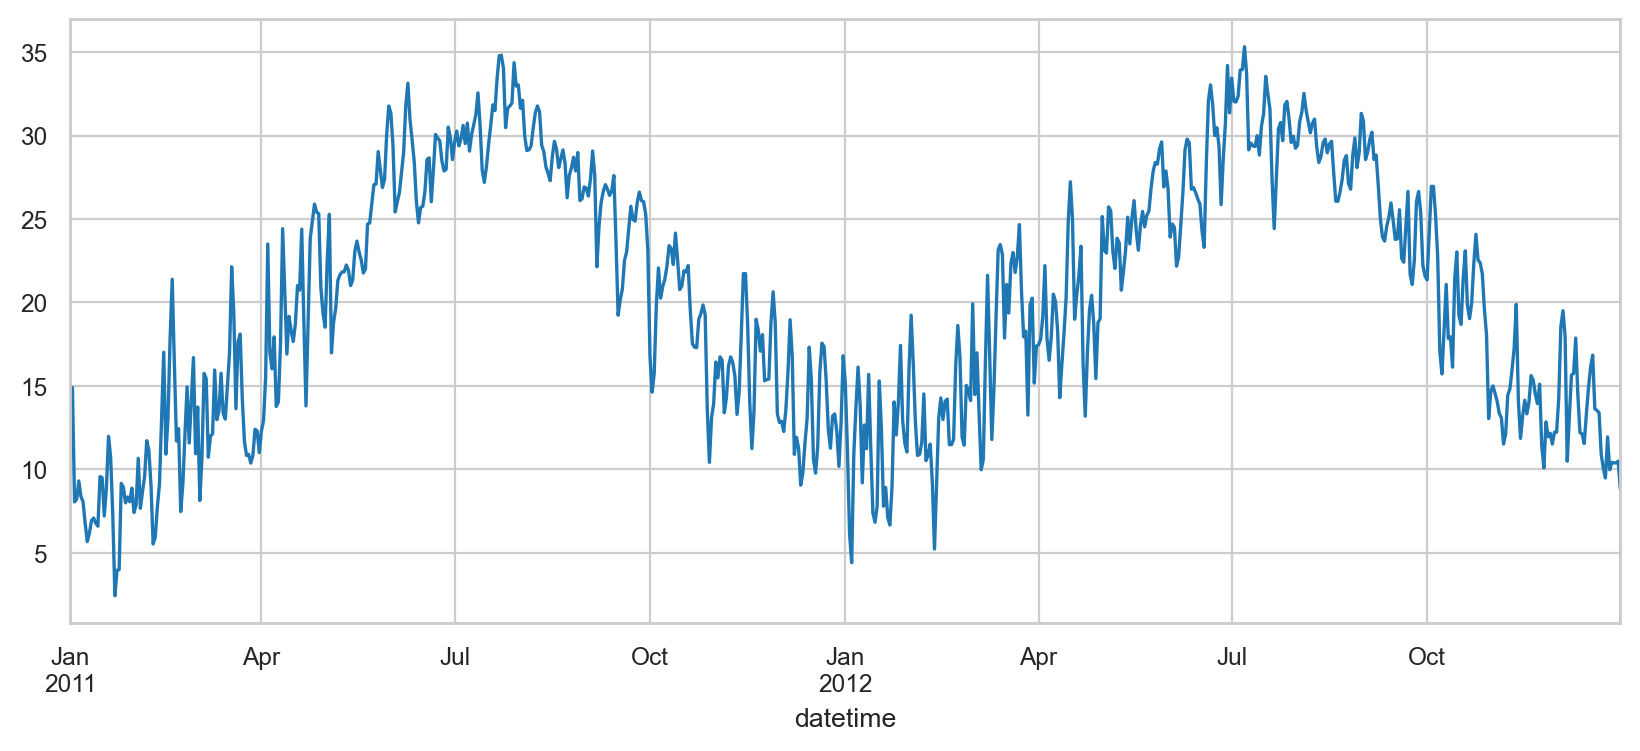

In [41]:
FEATURE = 'temp'

df[FEATURE].plot(figsize=(10, 4))

***

# Step 1: Data Preparation <a name="ml-data"></a>

Transform the time series prediction and forecasting tasks into regression tasks by defining new features using **rolling window** technique.

## 1.1: Rolling Window

Generate the 7-day average temperature values using the daily temperature readings from the past 7 days. Define new column `temp_7_day_mean` to store these values.

In [42]:
#7-day rolling mean
df.rolling(7).mean()[0:21]

temp
datetime             
2011-01-01        NaN
2011-01-02        NaN
2011-01-03        NaN
2011-01-04        NaN
2011-01-05        NaN
2011-01-06        NaN
2011-01-07  10.143603
2011-01-08   9.094198
2011-01-09   7.775492
2011-01-10   7.508815
2011-01-11   7.327776
2011-01-12   7.010147
2011-01-13   6.779681
2011-01-14   6.570862
2011-01-15   6.971100
2011-01-16   7.517766
2011-01-17   7.664195
2011-01-18   7.942853
2011-01-19   8.642469
2011-01-20   9.208659
2011-01-21   9.306066

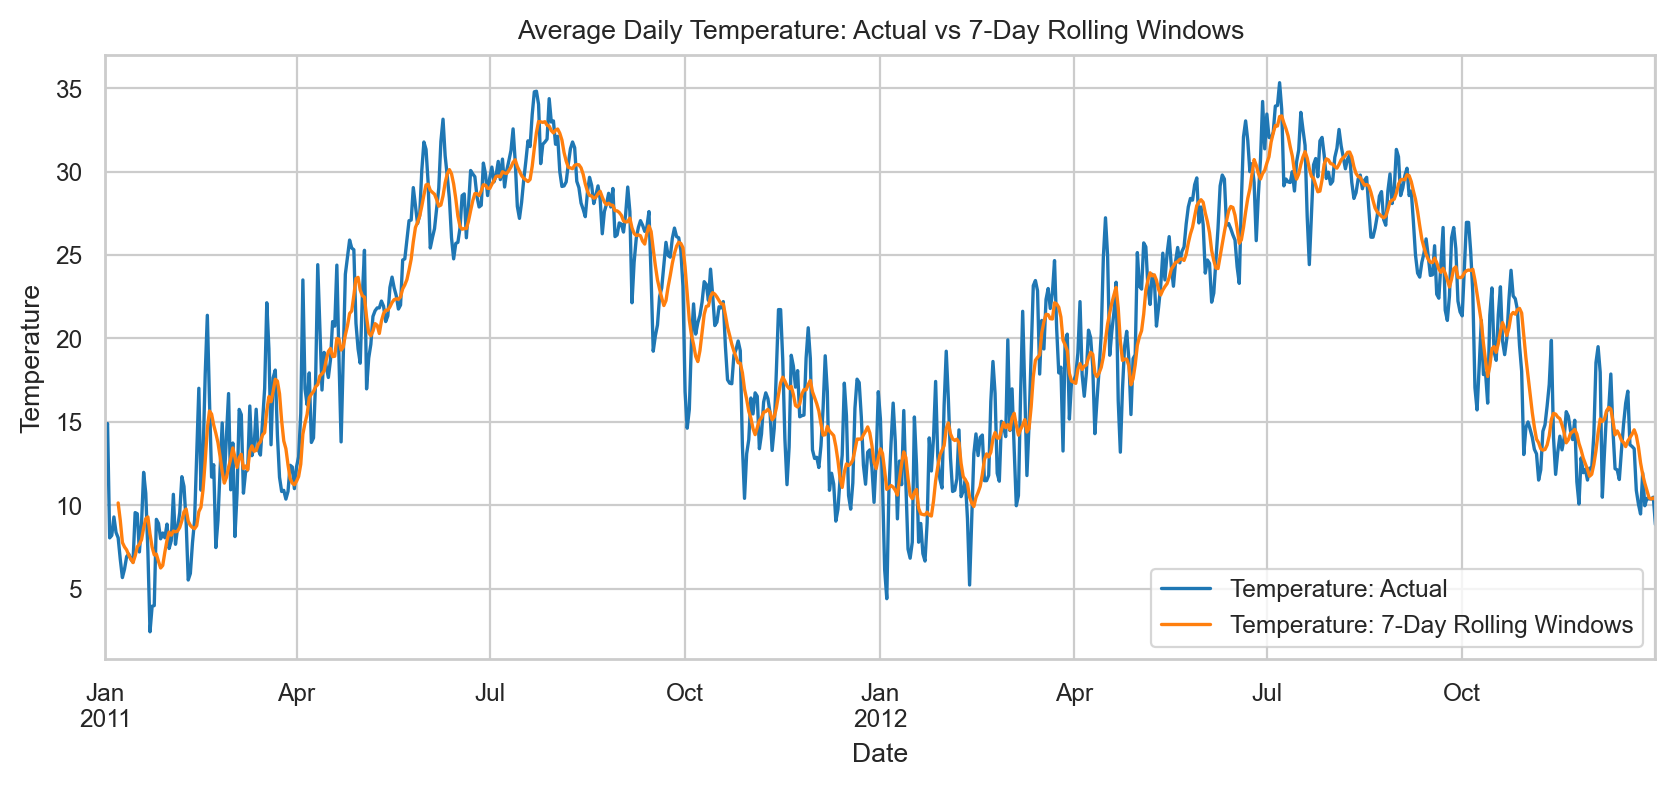

In [43]:
df['temp_7_day_mean'] = df[FEATURE].rolling(window=7).mean()

# df_7day = pd.DataFrame(df[[FEATURE, 'temp_7_day_mean']], index=df.index)

ax = df[[FEATURE, 'temp_7_day_mean']].plot(figsize=(10, 4))
# ax = df_7day.plot(figsize=(10, 4))
ax.set_title("Average Daily Temperature: Actual vs 7-Day Rolling Windows")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")
ax.legend(['Temperature: Actual', 'Temperature: 7-Day Rolling Windows'])

print()

Generate the 30-day average temperature values using the daily temperature readings from the past 30 days. Define new column `temp_30_day_mean` to store these values.

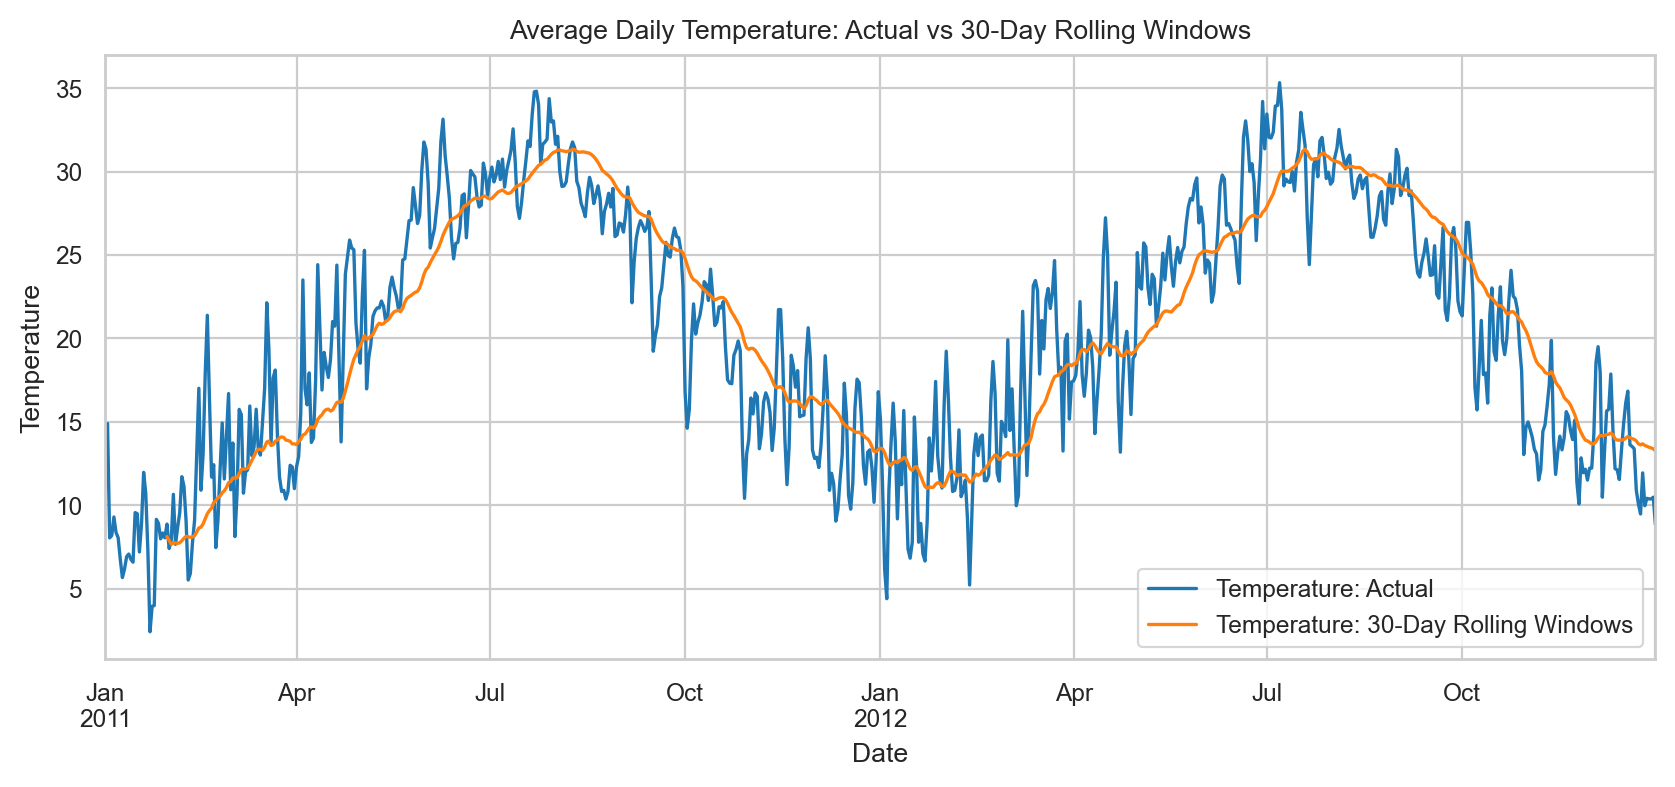

In [63]:
df['temp_30_day_mean'] = df[FEATURE].rolling(window=30).mean()
ax = df[[FEATURE, 'temp_30_day_mean']].plot(figsize=(10, 4))

ax.set_title("Average Daily Temperature: Actual vs 30-Day Rolling Windows")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")
ax.legend(['Temperature: Actual', 'Temperature: 30-Day Rolling Windows'])

print()

In [45]:
df

temp  temp_7_day_mean  temp_30_day_mean
datetime                                                
2011-01-01  14.110833              NaN               NaN
2011-01-02  14.902609              NaN               NaN
2011-01-03   8.050909              NaN               NaN
2011-01-04   8.200000              NaN               NaN
2011-01-05   9.305217              NaN               NaN
...               ...              ...               ...
2012-12-27  10.420833        10.885160         13.539309
2012-12-28  10.386667        10.455637         13.480087
2012-12-29  10.386667        10.382422         13.442454
2012-12-30  10.489167        10.440994         13.384371
2012-12-31   8.849167        10.350378         13.271621

[731 rows x 3 columns]

## 1.2: Train-Test Split

Selected features are
- `temp_7_day_mean`
- `temp_30_day_mean`

which are generated using **rolling window** techniques. Then, split the data into training and test set with the following condition:
- Training set: Records from **1 January 2011 - 31 August 2012**
- Test set: Records from **1 September - 31 December 2012**

In [46]:
#assigning the train, test, label and features.

features = ['temp_7_day_mean', 'temp_30_day_mean'] #features used
label = FEATURE # label

date_sep = '2012-09-01'

test_df = df[df.index >= date_sep] # index for test data
train_df = df[df.index < date_sep] # index for train data

train_df = train_df.dropna()

X_train, y_train = train_df[features], train_df[label] #assign train data
X_test, y_test = test_df[features], test_df[label] # assign test data

***

# Step 2: Machine Learning Models <a name="ml-model"></a>

Define helper functions to calculate errors and plot actual and predicted values using Machine Learning models.

In [47]:
# Define helper functions
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_errors(regressor, x_test, y_test):
    mae_calc = mean_absolute_error(y_test, regressor.predict(x_test))
    mre_calc = mean_relative_error(y_test, regressor.predict(x_test))
    mse_calc = mean_squared_error(y_test, regressor.predict(x_test))
    rmse_calc = rmse(y_test, regressor.predict(x_test))

    print('MAE: ', mae_calc)
    print('MRE: ', mre_calc)
    print('MSE: ', mse_calc)
    print('RMSE:', rmse_calc)

    
def plot_actual_and_predicted_values(df, regressor, x_test, y_test):
    predictions = regressor.predict(x_test)
    df['predictions'] = predictions
    
    ax = df[[FEATURE, 'predictions']].plot(figsize=(10, 4))

    ax.set_title("Average Daily Temperature: Actual vs Predicted")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature")
    ax.legend(['Temperature: Actual', 'Temperature: Predicted'])
    print()

### Model 1: XGBoost Regressor (learning rate = 0.01)

[0]	validation_0-mae:20.65548	validation_1-mae:17.53571
[1]	validation_0-mae:20.45071	validation_1-mae:17.35966
[2]	validation_0-mae:20.24797	validation_1-mae:17.18536
[3]	validation_0-mae:20.04724	validation_1-mae:17.01278
[4]	validation_0-mae:19.84850	validation_1-mae:16.84191
[5]	validation_0-mae:19.65173	validation_1-mae:16.67177
[6]	validation_0-mae:19.45690	validation_1-mae:16.50332
[7]	validation_0-mae:19.26402	validation_1-mae:16.33747
[8]	validation_0-mae:19.07303	validation_1-mae:16.17234
[9]	validation_0-mae:18.88395	validation_1-mae:16.00976
[10]	validation_0-mae:18.69677	validation_1-mae:15.84848
[11]	validation_0-mae:18.51141	validation_1-mae:15.68820
[12]	validation_0-mae:18.32793	validation_1-mae:15.52895
[13]	validation_0-mae:18.14623	validation_1-mae:15.37182
[14]	validation_0-mae:17.96637	validation_1-mae:15.21572
[15]	validation_0-mae:17.78825	validation_1-mae:15.06170
[16]	validation_0-mae:17.61194	validation_1-mae:14.90869
[17]	validation_0-mae:17.43738	validation

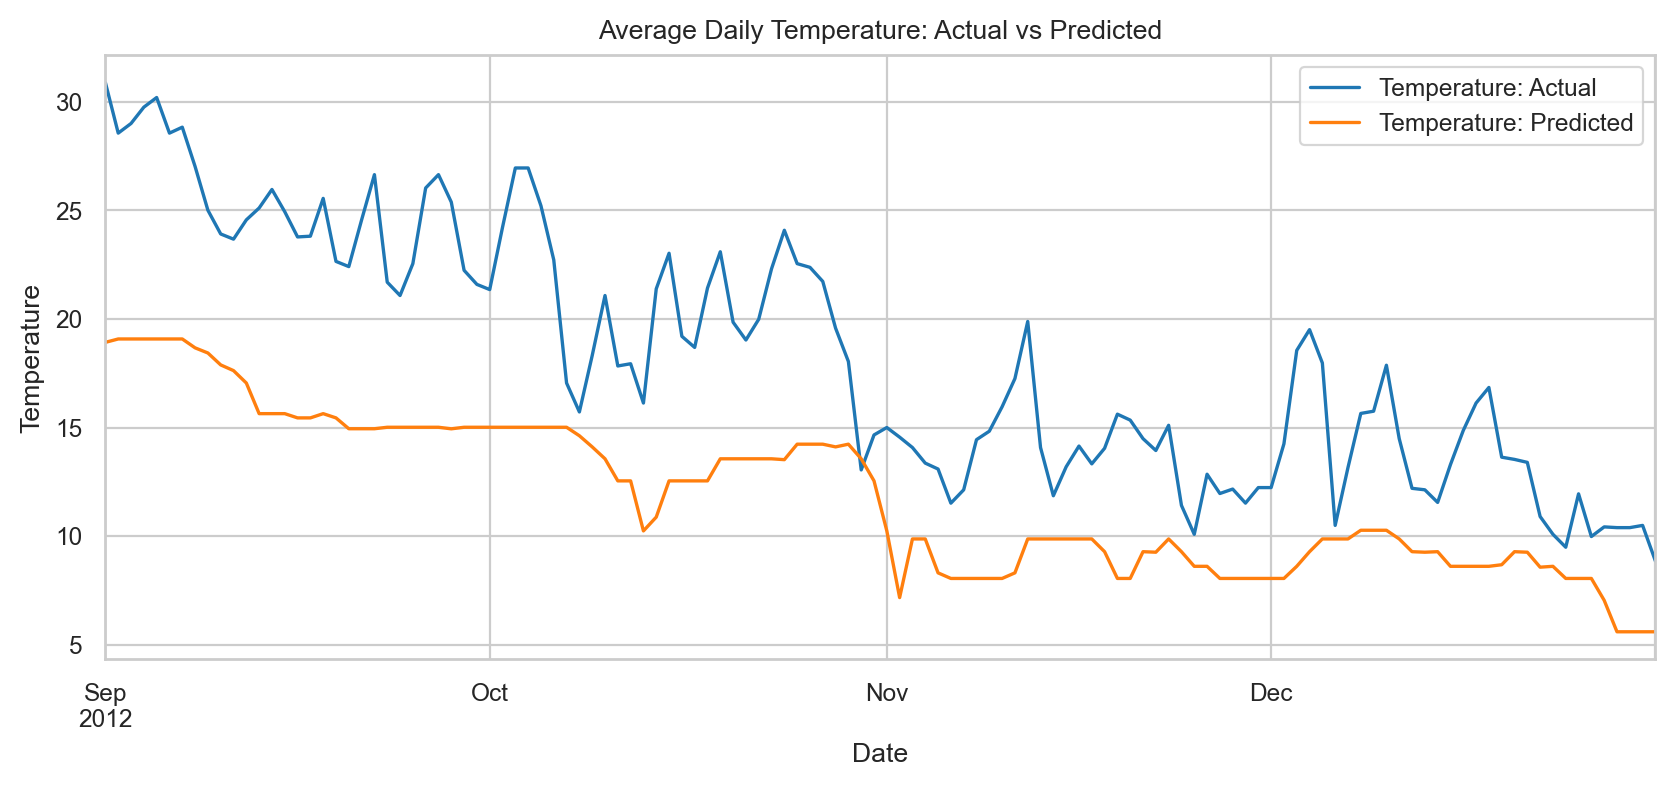

In [48]:
## Xgb with set value learning_rate = 0.01
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# # Decision Tree Regressor
# reg1 = DecisionTreeRegressor(random_state=0)
# reg1.fit(X_train, y_train)

# # Bagging Regressor
# reg1 = BaggingRegressor(DecisionTreeRegressor(), random_state=0, n_estimators=10)
# reg1.fit(X_train, y_train)

# XGBRegressor
reg1 = XGBRegressor(n_estimators=100, learning_rate=0.01)
reg1.fit(X_train, y_train, 
         eval_set=[(X_train, y_train), (X_test, y_test)], 
         eval_metric='mae')

print("\nCalculated errors:")
calculate_errors(reg1, X_test, y_test)
plot_actual_and_predicted_values(test_df, reg1, X_test, y_test)

### Model 2: XGBoost Regressor (learning rate = 0.1)

[0]	validation_0-mae:18.79411	validation_1-mae:15.93544
[1]	validation_0-mae:16.93130	validation_1-mae:14.31846
[2]	validation_0-mae:15.25384	validation_1-mae:12.86592
[3]	validation_0-mae:13.74513	validation_1-mae:11.53992
[4]	validation_0-mae:12.38733	validation_1-mae:10.35749
[5]	validation_0-mae:11.16814	validation_1-mae:9.30693
[6]	validation_0-mae:10.06904	validation_1-mae:8.33664
[7]	validation_0-mae:9.07960	validation_1-mae:7.49052
[8]	validation_0-mae:8.19209	validation_1-mae:6.73589
[9]	validation_0-mae:7.39863	validation_1-mae:6.07020
[10]	validation_0-mae:6.68234	validation_1-mae:5.42167
[11]	validation_0-mae:6.04270	validation_1-mae:4.90834
[12]	validation_0-mae:5.47192	validation_1-mae:4.43503
[13]	validation_0-mae:4.96112	validation_1-mae:4.01124
[14]	validation_0-mae:4.50729	validation_1-mae:3.69173
[15]	validation_0-mae:4.10372	validation_1-mae:3.41011
[16]	validation_0-mae:3.75220	validation_1-mae:3.13229
[17]	validation_0-mae:3.43800	validation_1-mae:2.87696
[18]	val

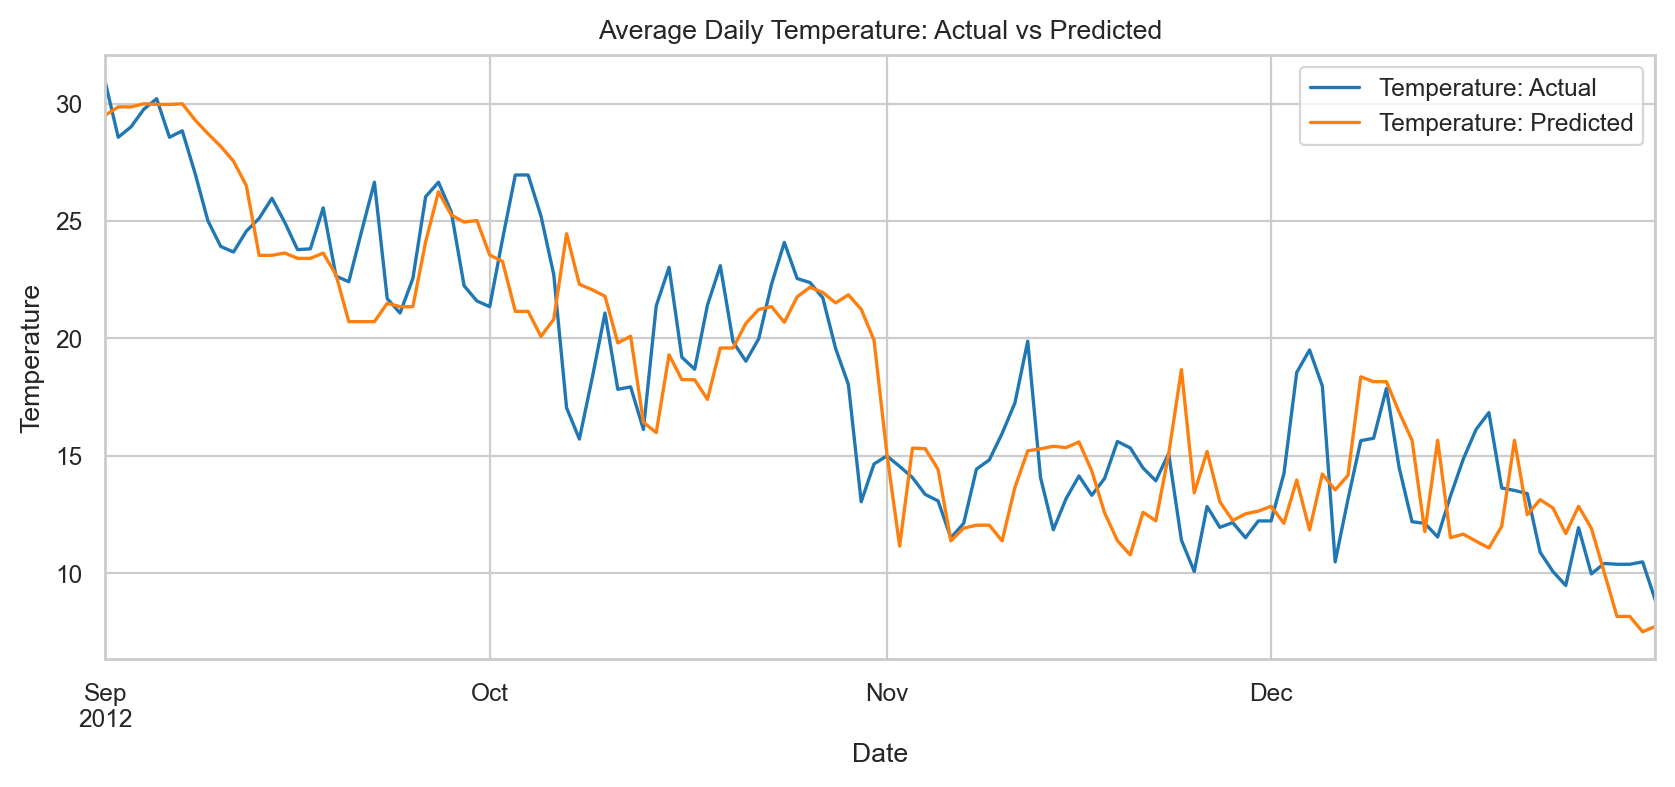

In [49]:
## Xgb with set value learning_rate = 0.1
reg2 = XGBRegressor(n_estimators=100, learning_rate=0.1)
reg2.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

print("\nCalculated errors:")
calculate_errors(reg2, X_test, y_test)
plot_actual_and_predicted_values(test_df, reg2, X_test, y_test)

### Model 3: XGBoost Regressor (learning rate = 0.3)

[0]	validation_0-mae:14.65772	validation_1-mae:12.37928
[1]	validation_0-mae:10.31104	validation_1-mae:8.55989
[2]	validation_0-mae:7.28759	validation_1-mae:5.83976
[3]	validation_0-mae:5.21727	validation_1-mae:4.15735
[4]	validation_0-mae:3.82040	validation_1-mae:3.19428
[5]	validation_0-mae:2.88815	validation_1-mae:2.51705
[6]	validation_0-mae:2.31488	validation_1-mae:2.18740
[7]	validation_0-mae:1.94677	validation_1-mae:2.09665
[8]	validation_0-mae:1.71200	validation_1-mae:2.01519
[9]	validation_0-mae:1.56535	validation_1-mae:1.99617
[10]	validation_0-mae:1.46563	validation_1-mae:2.09687
[11]	validation_0-mae:1.39708	validation_1-mae:2.08971
[12]	validation_0-mae:1.35308	validation_1-mae:2.09887
[13]	validation_0-mae:1.31815	validation_1-mae:2.10748
[14]	validation_0-mae:1.28566	validation_1-mae:2.14787
[15]	validation_0-mae:1.27260	validation_1-mae:2.14096
[16]	validation_0-mae:1.25633	validation_1-mae:2.18102
[17]	validation_0-mae:1.24391	validation_1-mae:2.18240
[18]	validation_0

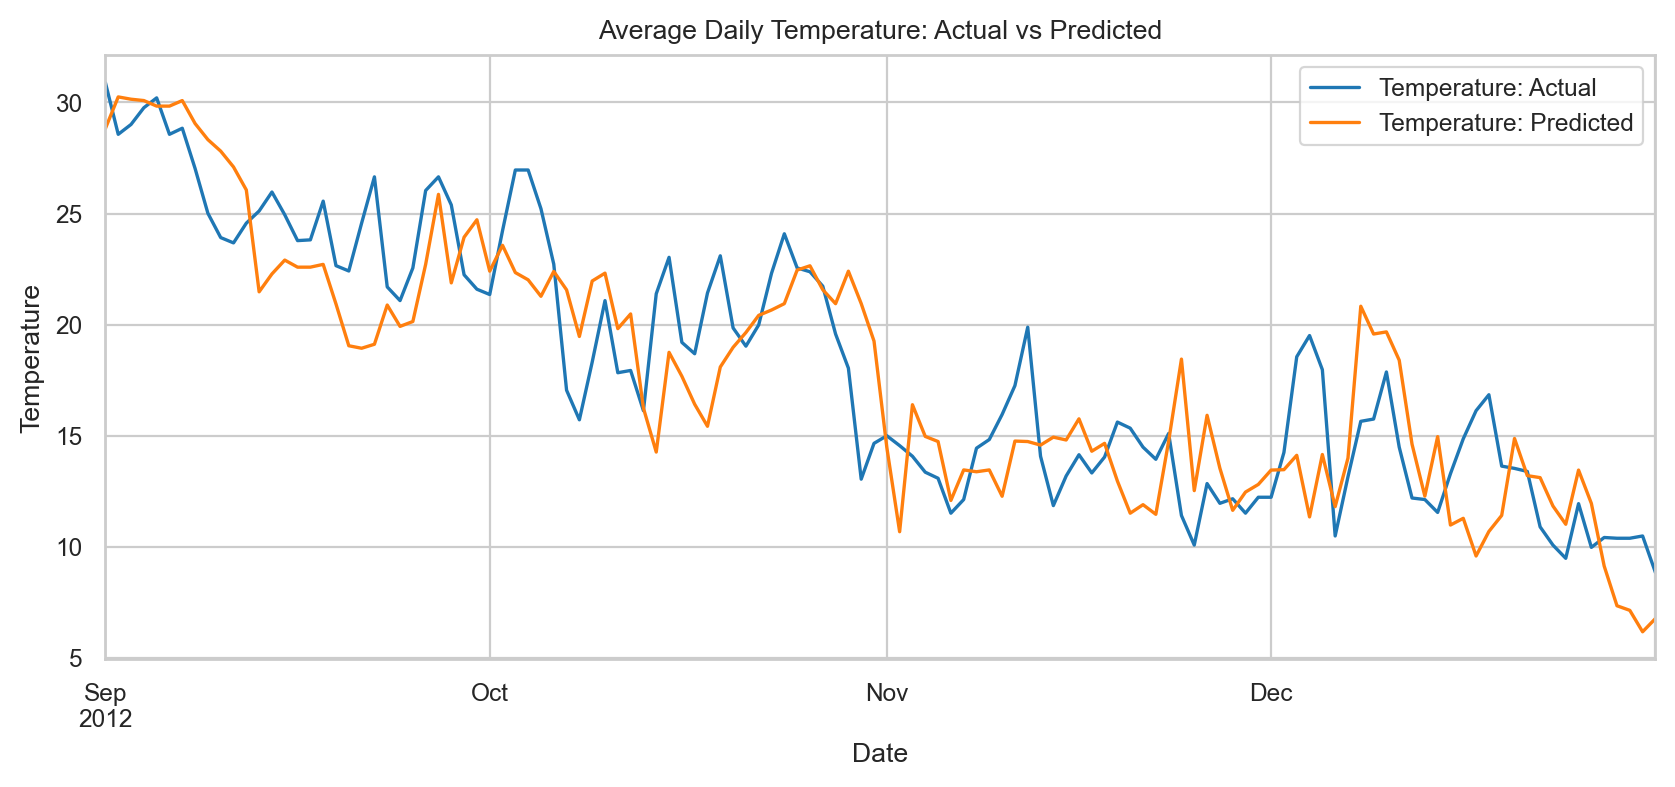

In [50]:
## Xgb with set value learning_rate = 0.3

reg3 = XGBRegressor(n_estimators=100, learning_rate=0.3)
reg3.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')


print("\nCalculated errors:")
calculate_errors(reg3, X_test, y_test)
plot_actual_and_predicted_values(test_df, reg3, X_test, y_test)

### Model 4: Decision Tree Regressor


Calculated errors:
MAE:  2.9011248083111947
MRE:  0.16788128767498953
MSE:  13.001131132432896
RMSE: 3.6057081318976576



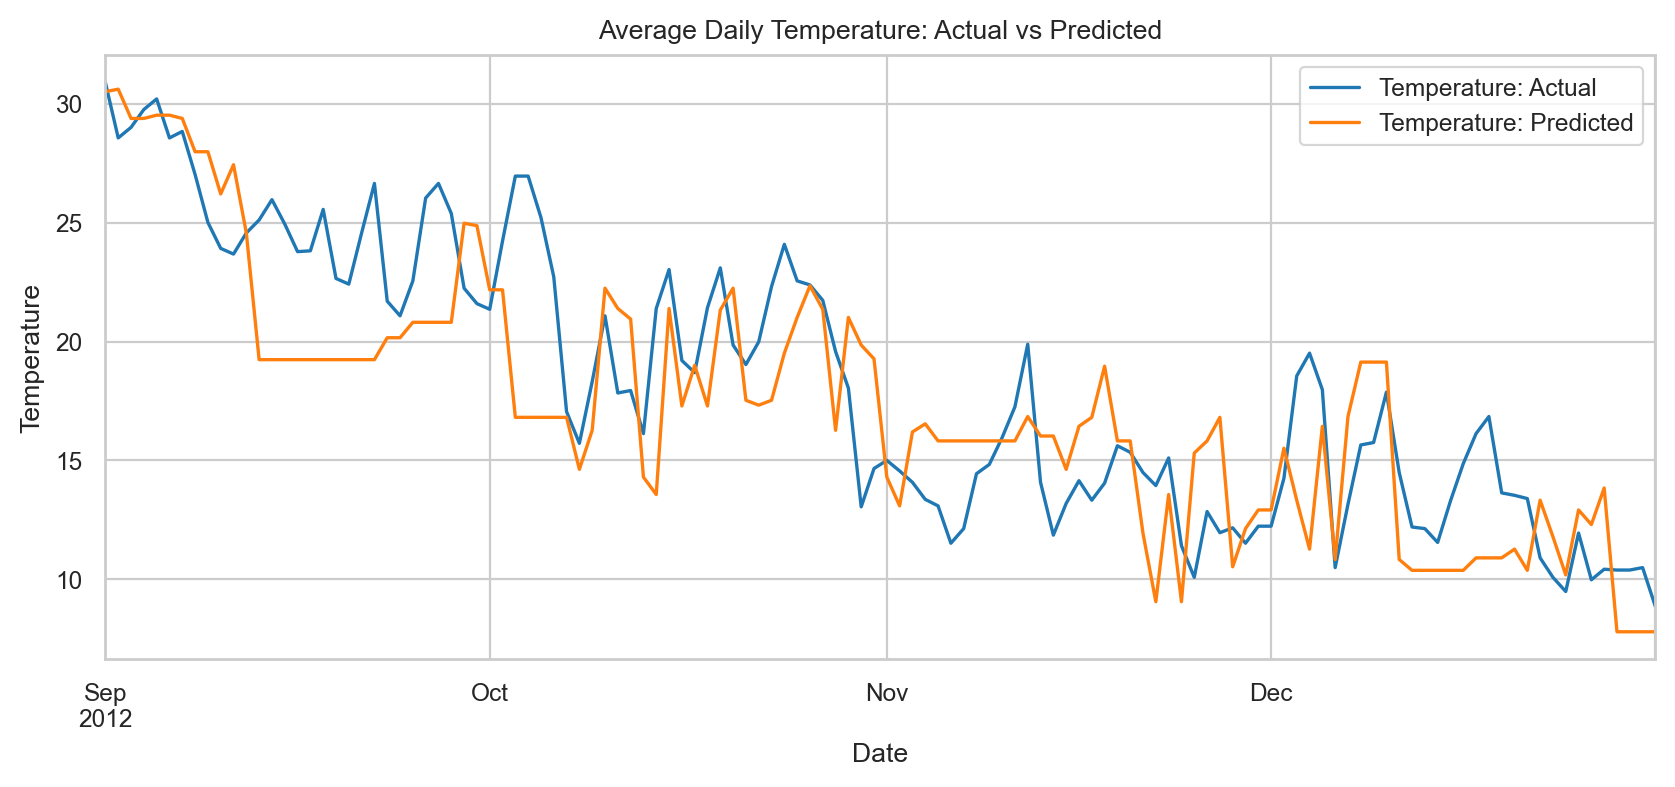

In [51]:
# Decision Tree Regressor
reg4 = DecisionTreeRegressor(random_state=0)
reg4.fit(X_train, y_train)

print("\nCalculated errors:")
calculate_errors(reg4, X_test, y_test)
plot_actual_and_predicted_values(test_df, reg4, X_test, y_test)

### Model 5: Bagging Regressor 


Calculated errors:
MAE:  2.086231543877837
MRE:  0.12516884716291504
MSE:  6.655657701832612
RMSE: 2.579856139755202



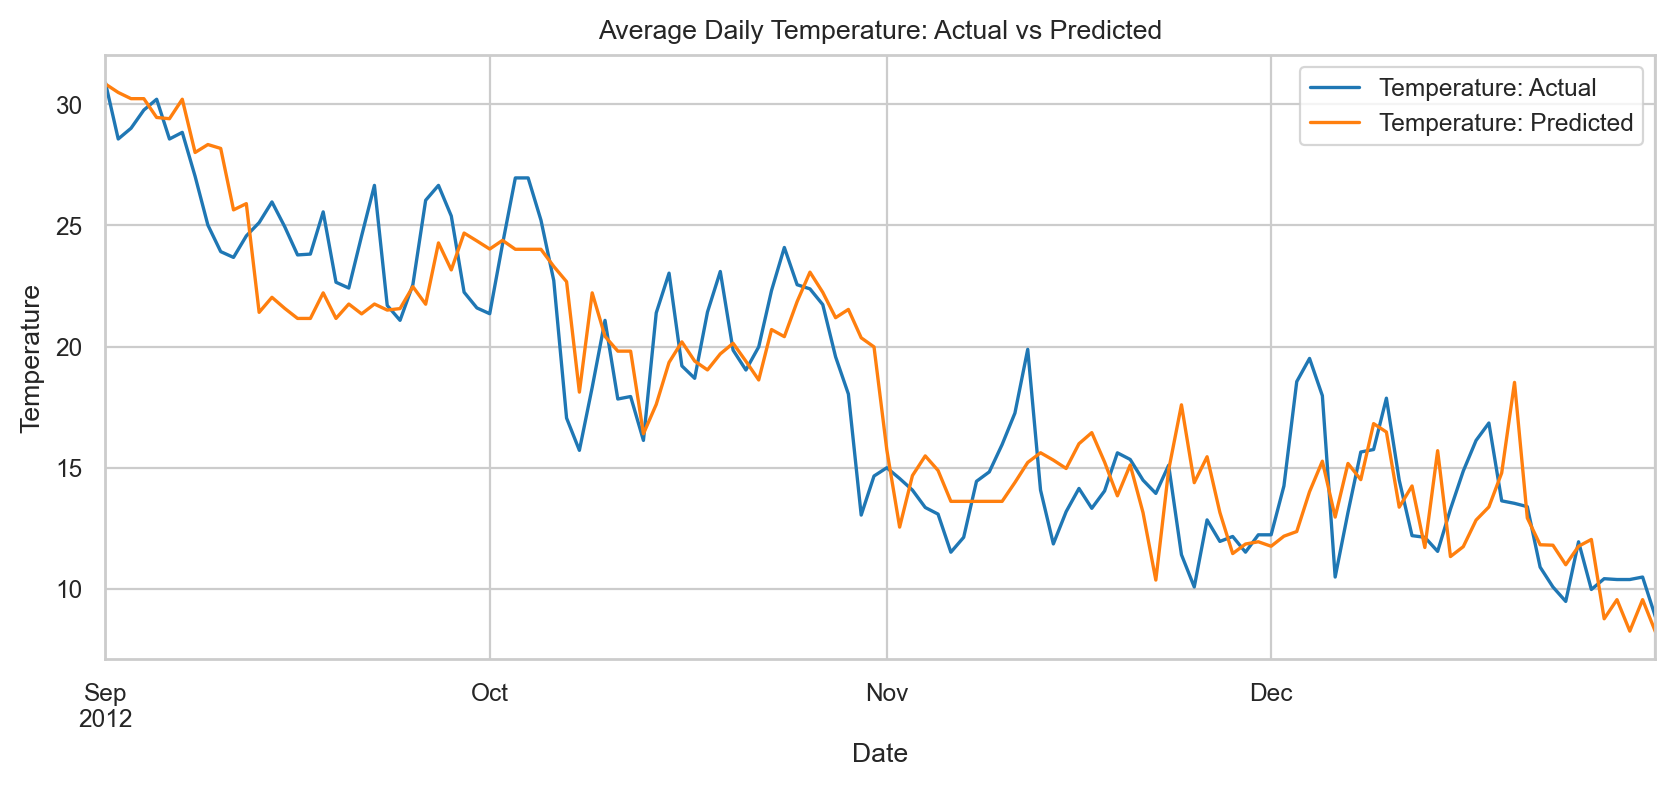

In [52]:
# Bagging Regressor
reg5 = BaggingRegressor(DecisionTreeRegressor(), random_state=0, n_estimators=10)
reg5.fit(X_train, y_train)

print("\nCalculated errors:")
calculate_errors(reg5, X_test, y_test)
plot_actual_and_predicted_values(test_df, reg5, X_test, y_test)

***

# Step 3: The Best Model <a name="ml-best"></a>

The best model is **Model 5**, which is the bagging model with decision tree as the base estimator.

> The prediction of this model yields the least errors between the actual and the predicted daily temperatures.

    Calculated errors:
    MAE:  2.086231543877837
    MRE:  0.12516884716291504
    MSE:  6.655657701832612
    RMSE: 2.579856139755202

In [53]:
predictions = reg5.predict(X_test)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              731 non-null    float64
 1   temp_7_day_mean   725 non-null    float64
 2   temp_30_day_mean  702 non-null    float64
dtypes: float64(3)
memory usage: 22.8 KB


In [55]:
test_df['predictions'] = predictions

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2012-09-01 to 2012-12-31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              122 non-null    float64
 1   temp_7_day_mean   122 non-null    float64
 2   temp_30_day_mean  122 non-null    float64
 3   predictions       122 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


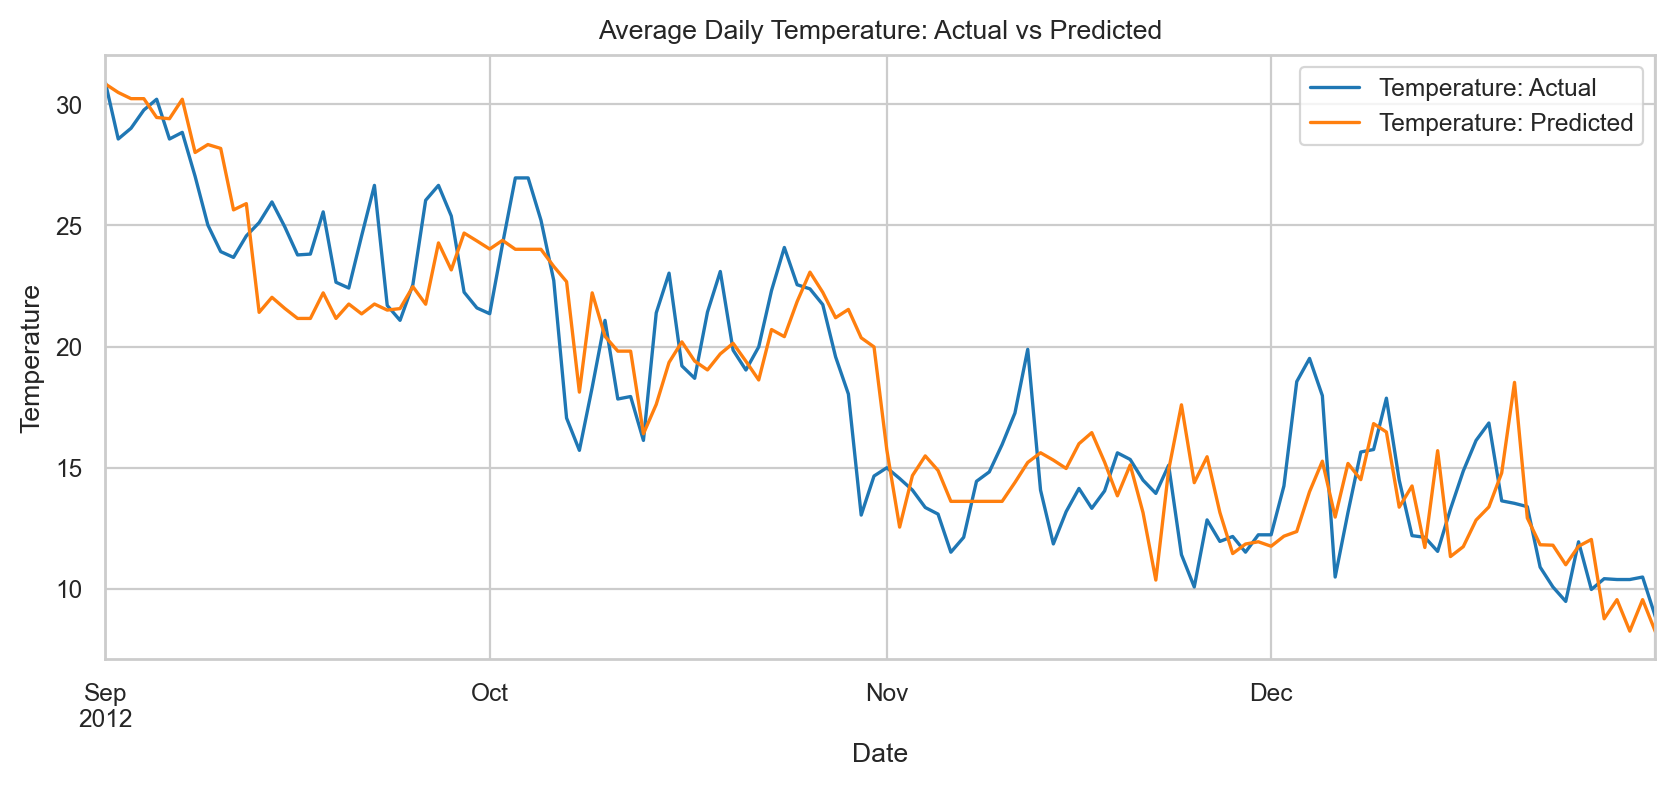

In [57]:
plot_actual_and_predicted_values(test_df, reg5, X_test, y_test)

In [58]:
test_df

temp  temp_7_day_mean  temp_30_day_mean  predictions
datetime                                                             
2012-09-01  30.886667        29.251548         29.177194    30.832000
2012-09-02  28.563333        29.505357         29.082667    30.483500
2012-09-03  29.007500        29.529762         28.965361    30.227250
2012-09-04  29.759167        29.515119         28.906139    30.227250
2012-09-05  30.203333        29.817738         28.884500    29.451667
...               ...              ...               ...          ...
2012-12-27  10.420833        10.885160         13.539309     8.767167
2012-12-28  10.386667        10.455637         13.480087     9.556417
2012-12-29  10.386667        10.382422         13.442454     8.258083
2012-12-30  10.489167        10.440994         13.384371     9.556417
2012-12-31   8.849167        10.350378         13.271621     8.230750

[122 rows x 4 columns]

***

# Step 4: Forecast of Time Series <a name="ml-forecast"></a>

Define helper function to transform a time series data into the format suitable for supervised learning tasks.

In [59]:
# ================================================================================
# Define helper function to transform a time series data into a supervised
# ... learning data.
# ================================================================================
def series_to_supervised(data, n_in=2, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = DataFrame(data)
    cols = list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    
    # put it all together
    agg = concat(cols, axis=1)
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg.values

Forecast the daily temperature from 1 - 10 Jan 2013 (10 days) using the best Machine Learning model.

In [60]:
# ================================================================================
# Since we have build the model, in this stage we are going to use the whole set
# ... of data again, but only select the temperature column. 
# ... This is because we only want to do forecasting on the temperature column.
# ================================================================================
values = df[FEATURE].values # select column temperature.
preds = [] 

# ================================================================================
# Define the number of forecasting. 10 indicates 10 new value will be forecasted. 
# ... You can change it accordingly.
# ================================================================================
num_days_pred = 10

for i in range(num_days_pred): 
    # transform the time series data into supervised learning. 
    # n_in=6 meaning you are using the first 6 value to forecast the value ahead
    forecast = series_to_supervised(values, n_in=6)
    
    # split into input and output columns
    forecastI, forecastO = forecast[:, :-1], forecast[:, -1]
    
    # fit model. Took back the value the we built before.
#     model = XGBRegressor(n_estimators=100, learning_rate=0.1)
    model = BaggingRegressor(DecisionTreeRegressor(), random_state=0, n_estimators=10)
    model.fit(forecastI, forecastO)
    
    # construct an input for a new preduction
    row = values[-6:].flatten()
    
    # make a prediction
    yhat = model.predict(asarray([row]))
    print('Input: %s, Predicted: %.3f' % (row, yhat[0]))
    
    values = np.append(values, yhat)
    preds.append(yhat)

Input: [ 9.97666667 10.42083333 10.38666667 10.38666667 10.48916667  8.84916667], Predicted: 8.390
Input: [10.42083333 10.38666667 10.38666667 10.48916667  8.84916667  8.39014493], Predicted: 9.074
Input: [10.38666667 10.38666667 10.48916667  8.84916667  8.39014493  9.07377536], Predicted: 8.735
Input: [10.38666667 10.48916667  8.84916667  8.39014493  9.07377536  8.73466377], Predicted: 8.616
Input: [10.48916667  8.84916667  8.39014493  9.07377536  8.73466377  8.61577565], Predicted: 8.951
Input: [8.84916667 8.39014493 9.07377536 8.73466377 8.61577565 8.95071357], Predicted: 8.678
Input: [8.39014493 9.07377536 8.73466377 8.61577565 8.95071357 8.67822614], Predicted: 8.337
Input: [9.07377536 8.73466377 8.61577565 8.95071357 8.67822614 8.33706352], Predicted: 7.980
Input: [8.73466377 8.61577565 8.95071357 8.67822614 8.33706352 7.97982191], Predicted: 8.458
Input: [8.61577565 8.95071357 8.67822614 8.33706352 7.97982191 8.45846162], Predicted: 7.930


In [61]:
import datetime 
df_preds = pd.DataFrame(preds, index=df.index[-len(preds):] + datetime.timedelta(days=num_days_pred))

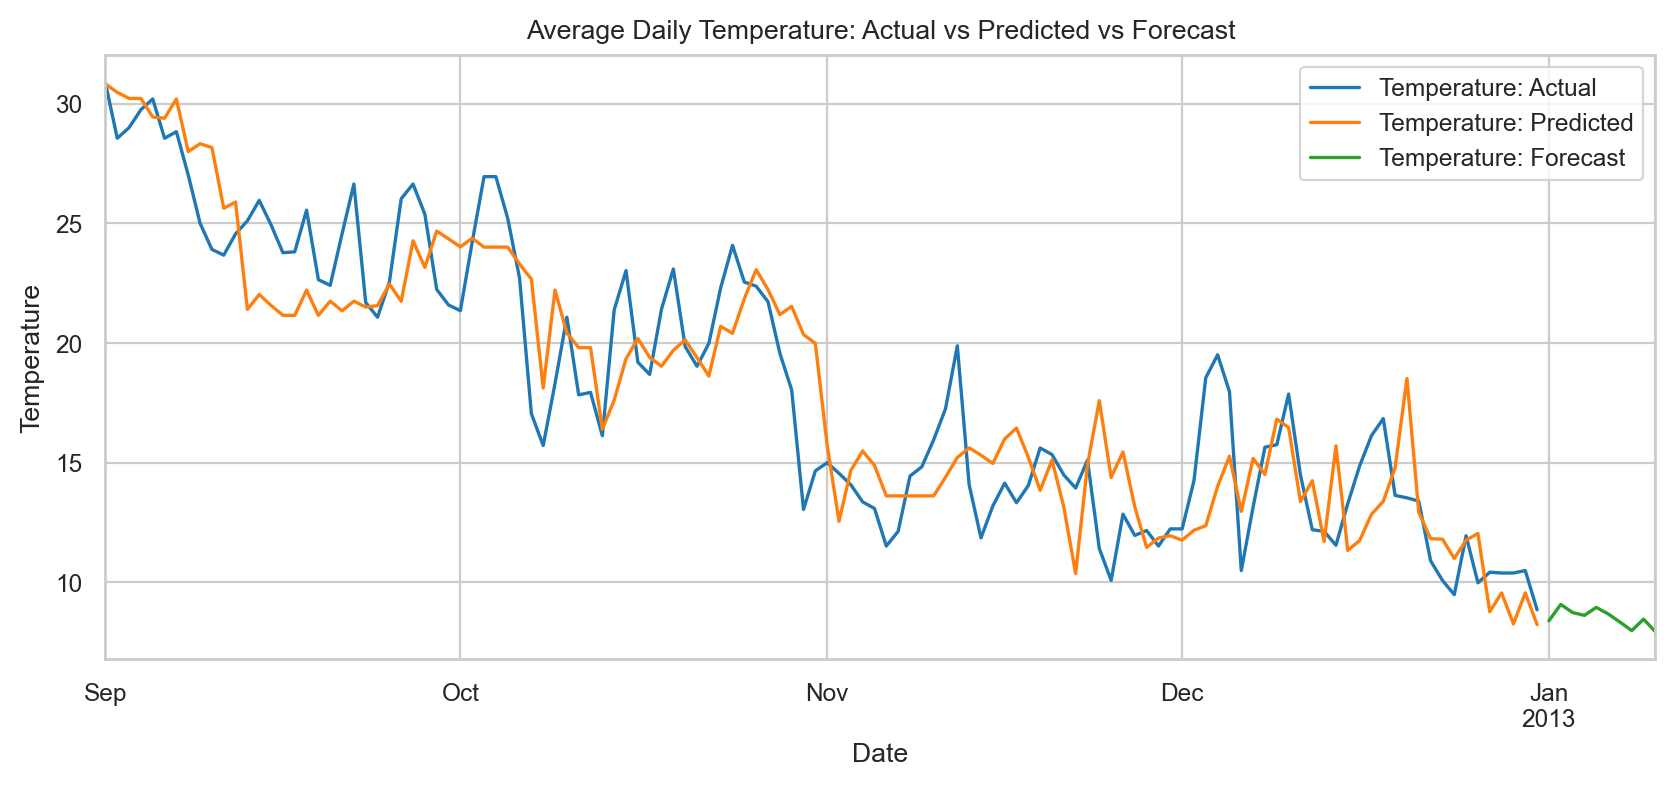

In [62]:
ax = df[df.index >= date_sep][FEATURE].plot(figsize=(10, 4), legend=True, label='Temperature: Actual')
ax = test_df['predictions'].plot(ax=ax, label='Temperature: Predicted')
ax = df_preds.plot(ax=ax, legend=True, label='Temperature: Forecast')

ax.set_title("Average Daily Temperature: Actual vs Predicted vs Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")
ax.legend(['Temperature: Actual', 'Temperature: Predicted', 'Temperature: Forecast'])

print()